In [ ]:
import pandas as pd
d=pd.read_excel(r"C:\Users\Arishma\Downloads\Gender .xlsx")
d

In [2]:
d.shape

(30, 22)

# Age

In [3]:
import pandas as pd


# Group the data by Gender and Age, then count the occurrences
age_counts_by_gender = d.groupby([ 'Age','Gender']).size().reset_index(name='Count')
data=pd.DataFrame(age_counts_by_gender)
data

,Age,Gender,Count
0,22,Female,2
1,22,Male,1
2,23,Female,1
3,23,Male,1
4,25,Female,1
5,25,Male,2
6,26,Female,2
7,26,Male,1
8,27,Female,6
9,28,Male,1


# Median age of all ages and its count based on Males and Females

In [4]:
import pandas as pd


# Calculate the mean age
mean_age = d['Age'].median()

# Separate the data based on mean age and gender
mean_age_female_count = d[(d['Gender'] == 'Female') & (d['Age'] <=mean_age)].shape[0]
mean_age_male_count = d[(d['Gender'] == 'Male') & (d['Age'] <= mean_age)].shape[0]

# Print the results
print(f"Meadian Age: {mean_age}")
print(f"Count of  Females upto the median age: {mean_age_female_count}")
print(f"Count of  Males  upto the median age: {mean_age_male_count}")


Meadian Age: 27.0
Count of  Females upto the median age: 12
Count of  Males  upto the median age: 5


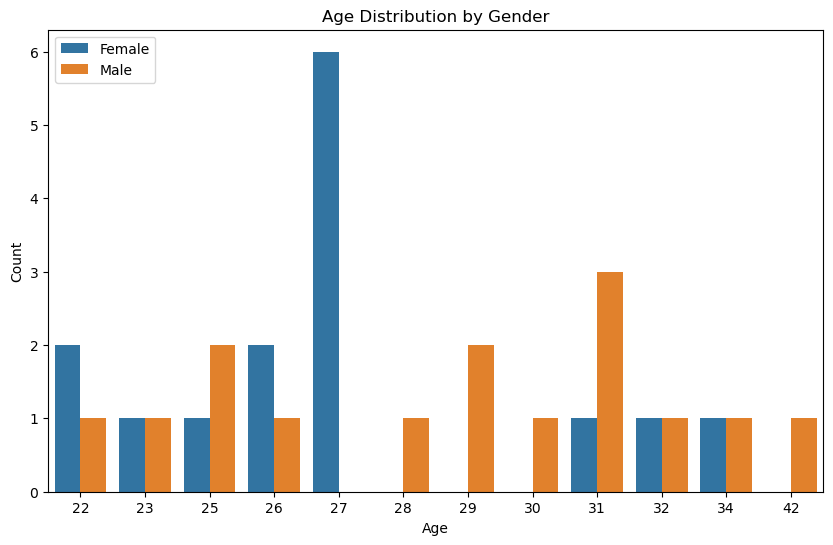

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Sample DataFrame with age and gender


# Group the data by Gender and Age, then count the occurrences
age_counts_by_gender = d.groupby(['Gender', 'Age']).size().reset_index(name='Count')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=age_counts_by_gender, x='Age', y='Count', hue='Gender')
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()


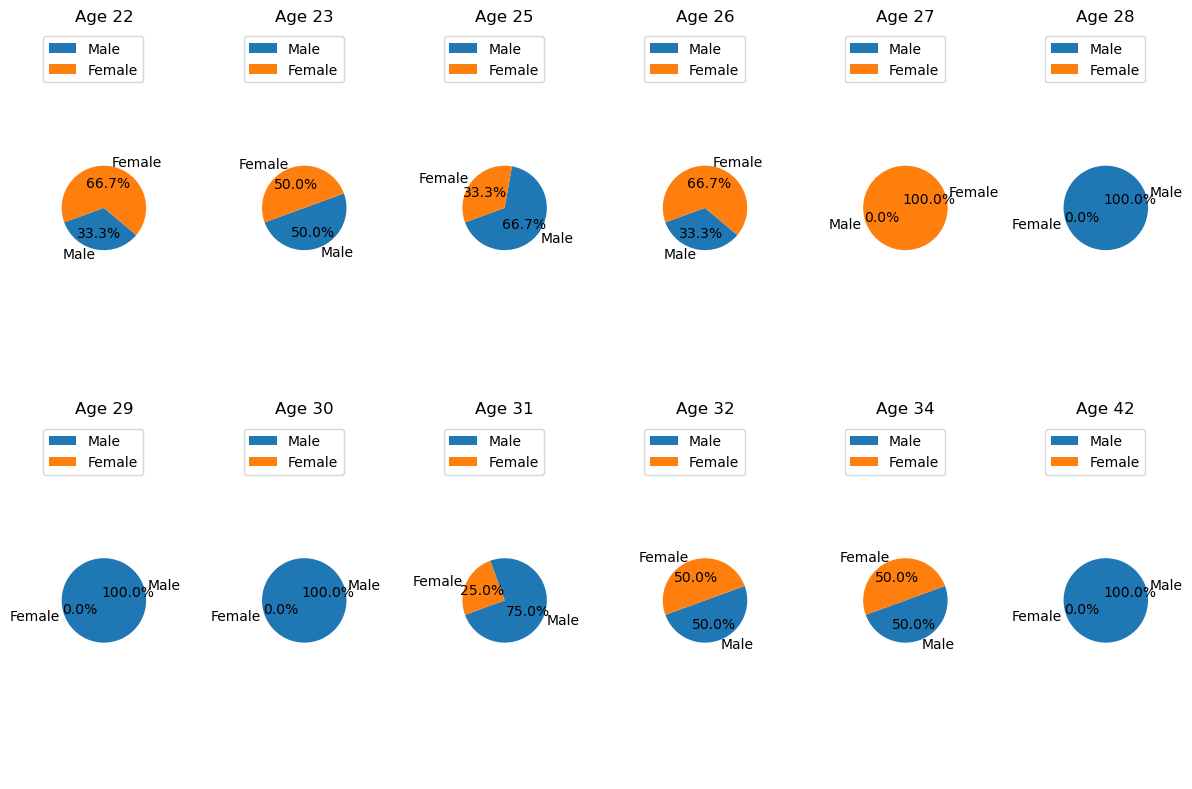

<Figure size 640x480 with 0 Axes>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame with age and gender

# Group the data by Age and Gender, then count the occurrences
age_counts_by_gender = d.groupby(['Age', 'Gender']).size().reset_index(name='Count')

# Create a dictionary to store the counts for each age
age_counts = {}
for age, gender, count in age_counts_by_gender.values:
    if age not in age_counts:
        age_counts[age] = {'Male': 0, 'Female': 0}
    age_counts[age][gender] = count

# Convert the dictionary to a DataFrame
age_counts_df = pd.DataFrame.from_dict(age_counts, orient='index')

# Calculate the number of rows and columns for the subplot grid
n_rows = 2
n_cols = (len(age_counts_df) + n_rows - 1) // n_rows

# Create subplots with equal aspect ratio
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 8))
fig.subplots_adjust(hspace=0.4)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create a pie chart for each age
for i, (age, counts) in enumerate(age_counts_df.iterrows()):
    ax = axes[i]
    labels = counts.index
    sizes = counts.values
    patches, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=200)
    ax.set_title(f'Age {age}')
    ax.axis('equal')
    
    # Add legend to the pie chart
    ax.legend(patches, labels, loc="upper right")

# Hide any unused subplots
for i in range(len(age_counts_df), n_rows * n_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()
plt.savefig("Age Vs Gender [1].jpg")

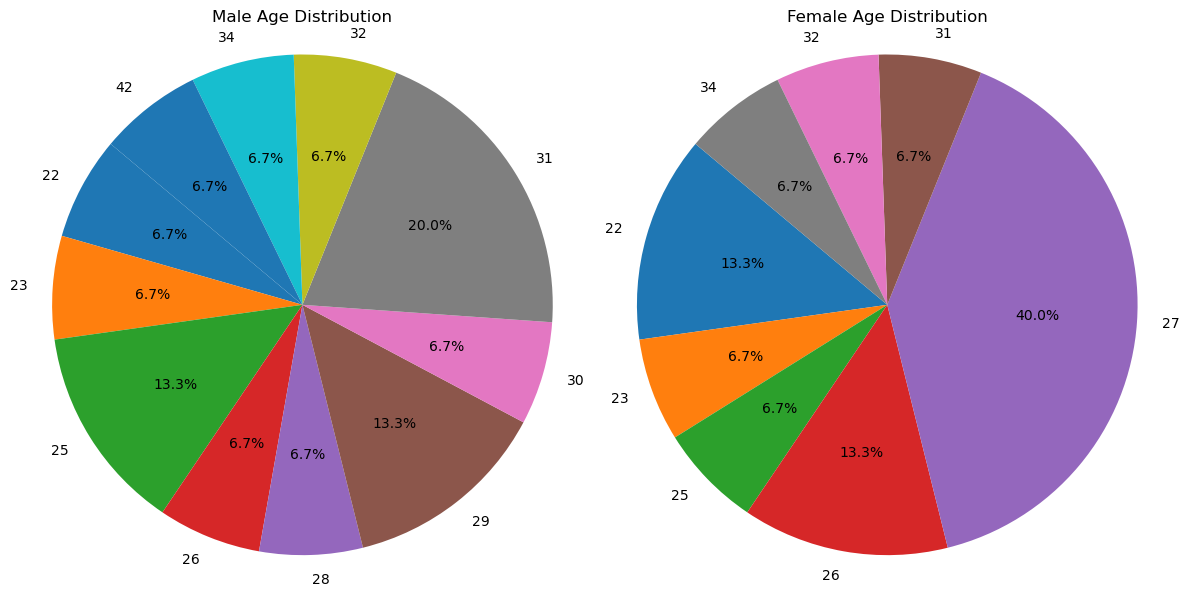

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Group the data by Gender and Age, then count the occurrences
age_counts_by_gender = d.groupby(['Gender', 'Age']).size().reset_index(name='Count')

# Separate the data for each gender
male_age_counts = age_counts_by_gender[age_counts_by_gender['Gender'] == 'Male']
female_age_counts = age_counts_by_gender[age_counts_by_gender['Gender'] == 'Female']

# Create pie plots for each gender
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Male Age Distribution
axes[0].pie(male_age_counts['Count'], labels=male_age_counts['Age'], autopct='%1.1f%%', startangle=140)
axes[0].set_title('Male Age Distribution')
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Female Age Distribution
axes[1].pie(female_age_counts['Count'], labels=female_age_counts['Age'], autopct='%1.1f%%', startangle=140)
axes[1].set_title('Female Age Distribution')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()


# Annual Income

In [8]:
d["Annual Income"].value_counts()

Annual Income
Upto 2,50,000          13
2,50,000 - 5,00,000     9
5,00,000- 7,50,000      6
Above 10 lakhs          2
Name: count, dtype: int64

# Mean income of Annual income and its count based on Females and Males

In [83]:


income_category_medians = {
    'Upto 2,50,000': 150000,      # Median of 1 and 5
    '2,50,000 - 5,00,000': 350000,   # Median of 5 and 10
    '5,00,000- 7,50,000': 650000,        # Median of 10
    'Above 10 lakhs':100000
}
# Calculate the median  each income category

# Calculate the median for each income category
d['Median Income'] = d['Annual Income'].apply(lambda x: income_category_medians[x])
# Calculate the overall median income
overall_median_income = d['Median Income'].mean()

# Separate the data based on gender and income below the overall median
female_below_median_count = d[(d['Gender'] == 'Female') & (d['Median Income'] <= overall_median_income)].shape[0]
male_below_median_count = d[(d['Gender'] == 'Male') & (d['Median Income'] <= overall_median_income)].shape[0]

# Print the results
print(f"Overall Mean Income: {overall_median_income}")
print(f"Count of Females below Overall Mean Income: {female_below_median_count}")
print(f"Count of Males below Overall Mean Income: {male_below_median_count}")


Overall Mean Income: 306666.6666666667
Count of Females below Overall Mean Income: 7
Count of Males below Overall Mean Income: 8


In [11]:
annual_income_counts_by_gender = d.groupby([ 'Annual Income','Gender']).size().reset_index(name='Count')
data=pd.DataFrame(annual_income_counts_by_gender)
data

,Annual Income,Gender,Count
0,"2,50,000 - 5,00,000",Female,5
1,"2,50,000 - 5,00,000",Male,4
2,"5,00,000- 7,50,000",Female,3
3,"5,00,000- 7,50,000",Male,3
4,Above 10 lakhs,Male,2
5,"Upto 2,50,000",Female,7
6,"Upto 2,50,000",Male,6


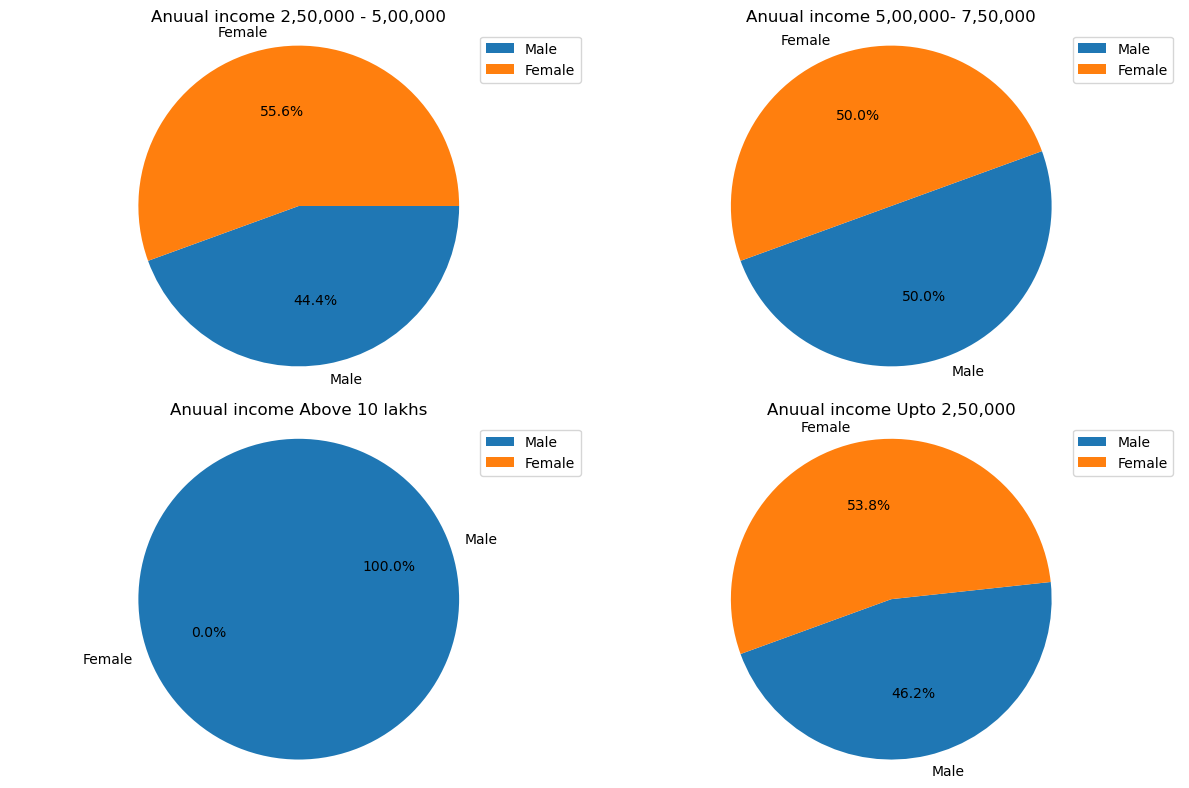

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame with age and gender

# Group the data by Age and Gender, then count the occurrences
age_counts_by_gender = d.groupby(['Annual Income', 'Gender']).size().reset_index(name='Count')

# Create a dictionary to store the counts for each age
age_counts = {}
for age, gender, count in age_counts_by_gender.values:
    if age not in age_counts:
        age_counts[age] = {'Male': 0, 'Female': 0}
    age_counts[age][gender] = count

# Convert the dictionary to a DataFrame
age_counts_df = pd.DataFrame.from_dict(age_counts, orient='index')

# Calculate the number of rows and columns for the subplot grid
n_rows = 2
n_cols = (len(age_counts_df) + n_rows - 1) // n_rows

# Create subplots with equal aspect ratio
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 8))
fig.subplots_adjust(hspace=0.4)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create a pie chart for each age
for i, (age, counts) in enumerate(age_counts_df.iterrows()):
    ax = axes[i]
    labels = counts.index
    sizes = counts.values
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=200)
    ax.set_title(f'Anuual income {age}')
    ax.axis('equal')
    ax.legend(patches, labels, loc="upper right")

# Hide any unused subplots
for i in range(len(age_counts_df), n_rows * n_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


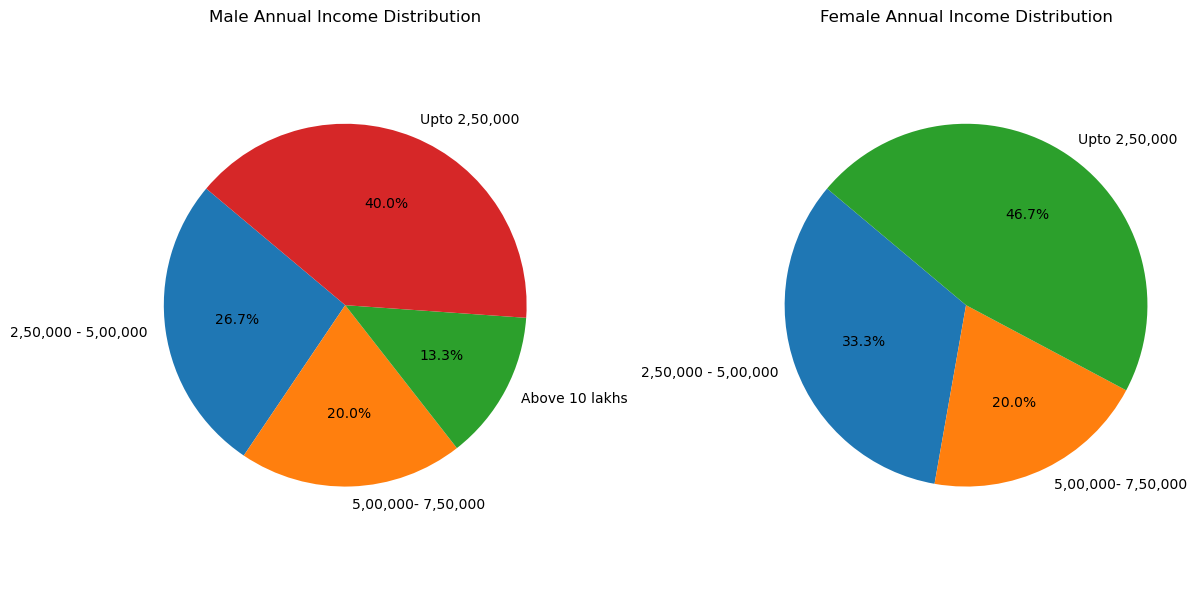

In [13]:
# Group the data by Gender and Age, then count the occurrences
age_counts_by_gender = d.groupby(['Gender', 'Annual Income']).size().reset_index(name='Count')

# Separate the data for each gender
male_age_counts = age_counts_by_gender[age_counts_by_gender['Gender'] == 'Male']
female_age_counts = age_counts_by_gender[age_counts_by_gender['Gender'] == 'Female']

# Create pie plots for each gender
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Male Age Distribution
axes[0].pie(male_age_counts['Count'], labels=male_age_counts['Annual Income'], autopct='%1.1f%%', startangle=140)
axes[0].set_title('Male Annual Income Distribution')
axes[0].axis('equal')

# Equal aspect ratio ensures that pie is drawn as a circle.

# Female Age Distribution
axes[1].pie(female_age_counts['Count'], labels=female_age_counts['Annual Income'], autopct='%1.1f%%', startangle=140)
axes[1].set_title('Female Annual Income Distribution')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

# Religion

In [14]:
d["Religion"].value_counts()

Religion
Hindu        16
Christian    13
Muslim        1
Name: count, dtype: int64

In [15]:
Religion_by_gender = d.groupby([ 'Religion','Gender']).size().reset_index(name='Count')
data=pd.DataFrame(Religion_by_gender)
data

,Religion,Gender,Count
0,Christian,Female,8
1,Christian,Male,5
2,Hindu,Female,6
3,Hindu,Male,10
4,Muslim,Female,1


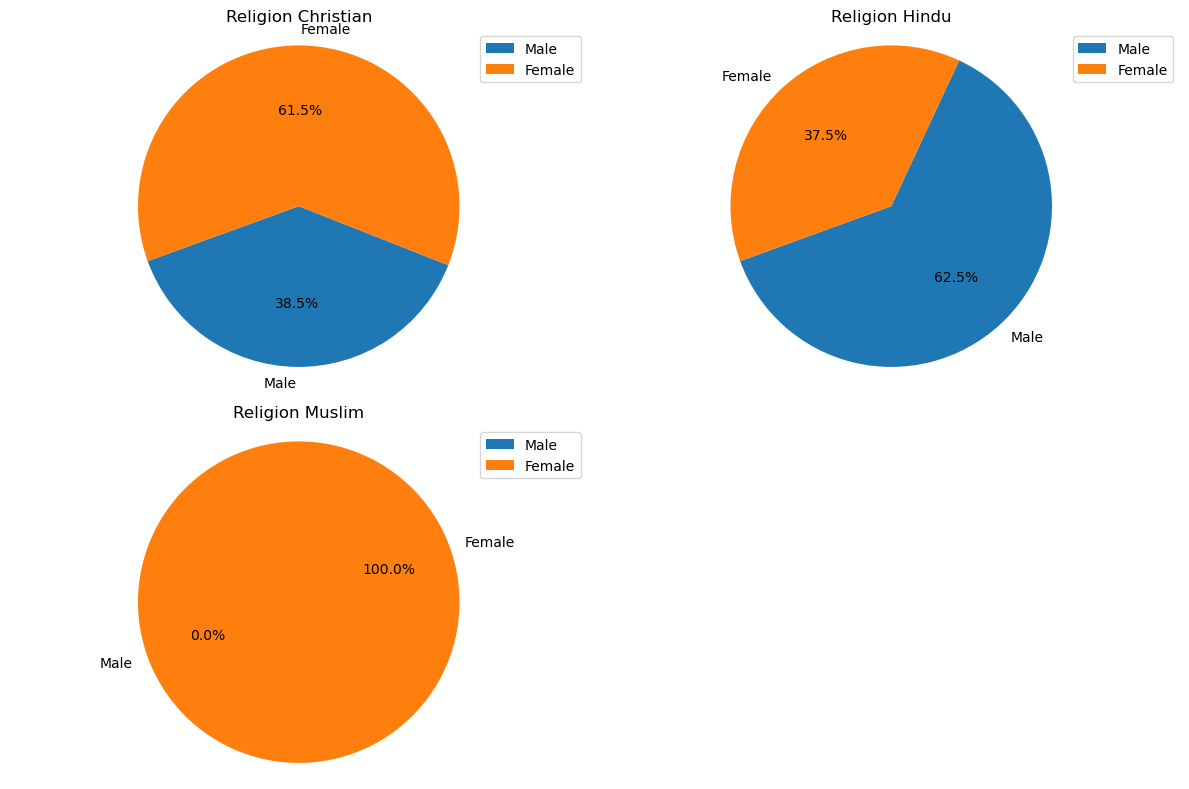

In [16]:
age_counts_by_gender = d.groupby(['Religion', 'Gender']).size().reset_index(name='Count')

# Create a dictionary to store the counts for each age
age_counts = {}
for age, gender, count in age_counts_by_gender.values:
    if age not in age_counts:
        age_counts[age] = {'Male': 0, 'Female': 0}
    age_counts[age][gender] = count

# Convert the dictionary to a DataFrame
age_counts_df = pd.DataFrame.from_dict(age_counts, orient='index')

# Calculate the number of rows and columns for the subplot grid
n_rows = 2
n_cols = (len(age_counts_df) + n_rows - 1) // n_rows

# Create subplots with equal aspect ratio
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 8))
fig.subplots_adjust(hspace=0.4)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create a pie chart for each age
for i, (age, counts) in enumerate(age_counts_df.iterrows()):
    ax = axes[i]
    labels = counts.index
    sizes = counts.values
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=200)
    ax.set_title(f'Religion {age}')
    ax.axis('equal')
    ax.legend(patches, labels, loc="upper right")

# Hide any unused subplots
for i in range(len(age_counts_df), n_rows * n_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


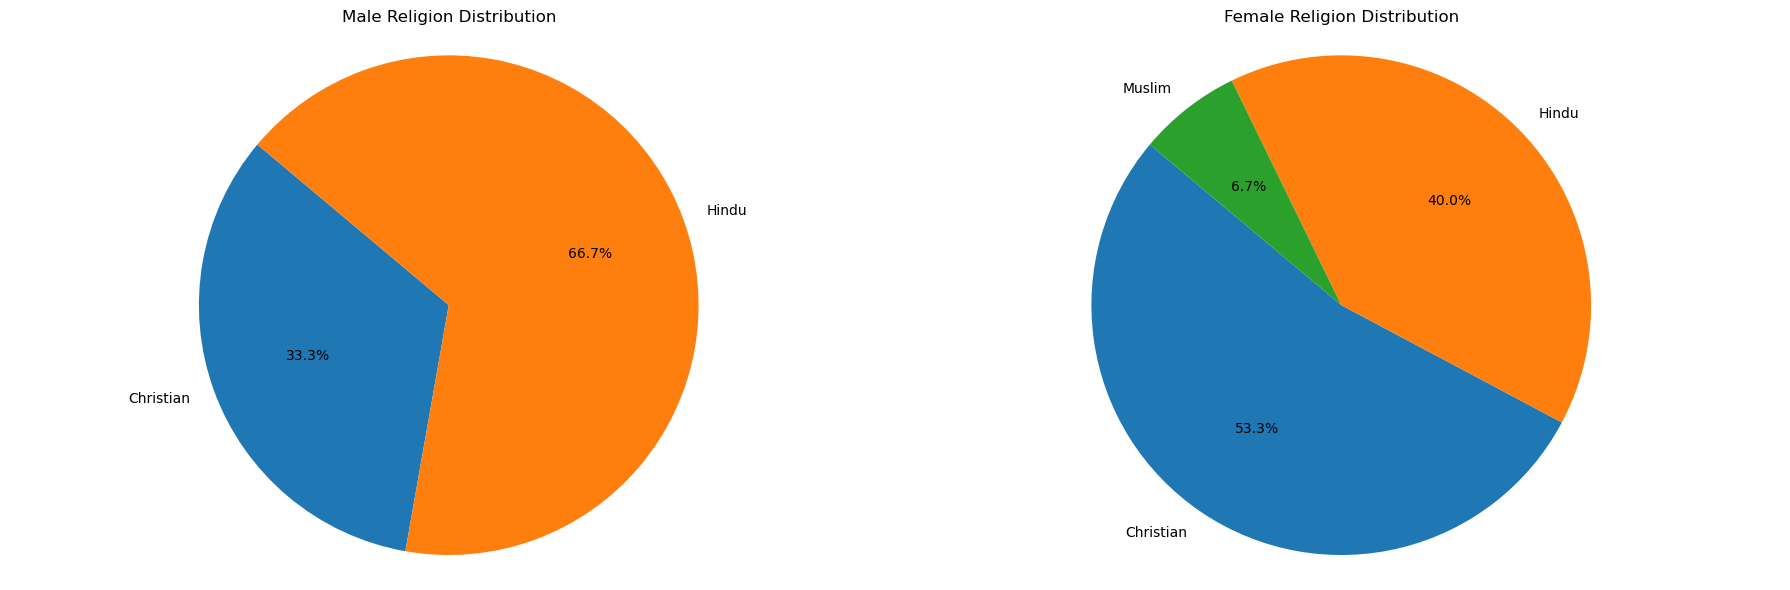

In [17]:
# Group the data by Gender and Age, then count the occurrences
age_counts_by_gender = d.groupby(['Gender', 'Religion']).size().reset_index(name='Count')

# Separate the data for each gender
male_age_counts = age_counts_by_gender[age_counts_by_gender['Gender'] == 'Male']
female_age_counts = age_counts_by_gender[age_counts_by_gender['Gender'] == 'Female']

# Create pie plots for each gender
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Male Age Distribution
axes[0].pie(male_age_counts['Count'], labels=male_age_counts['Religion'], autopct='%1.1f%%', startangle=140)
axes[0].set_title('Male Religion Distribution')
axes[0].axis('equal')

# Equal aspect ratio ensures that pie is drawn as a circle.

# Female Age Distribution
axes[1].pie(female_age_counts['Count'], labels=female_age_counts['Religion'], autopct='%1.1f%%', startangle=140)
axes[1].set_title('Female Religion Distribution')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

# Social group

In [18]:
d["Social group\n"].value_counts()

Social group\n
General    18
OBC         9
SC/ST       2
EWS         1
Name: count, dtype: int64

In [19]:
Social_groups_by_gender = d.groupby([ 'Social group\n','Gender']).size().reset_index(name='Count')
data=pd.DataFrame(Social_groups_by_gender)
data

,Social group\n,Gender,Count
0,EWS,Female,1
1,General,Female,8
2,General,Male,10
3,OBC,Female,5
4,OBC,Male,4
5,SC/ST,Female,1
6,SC/ST,Male,1


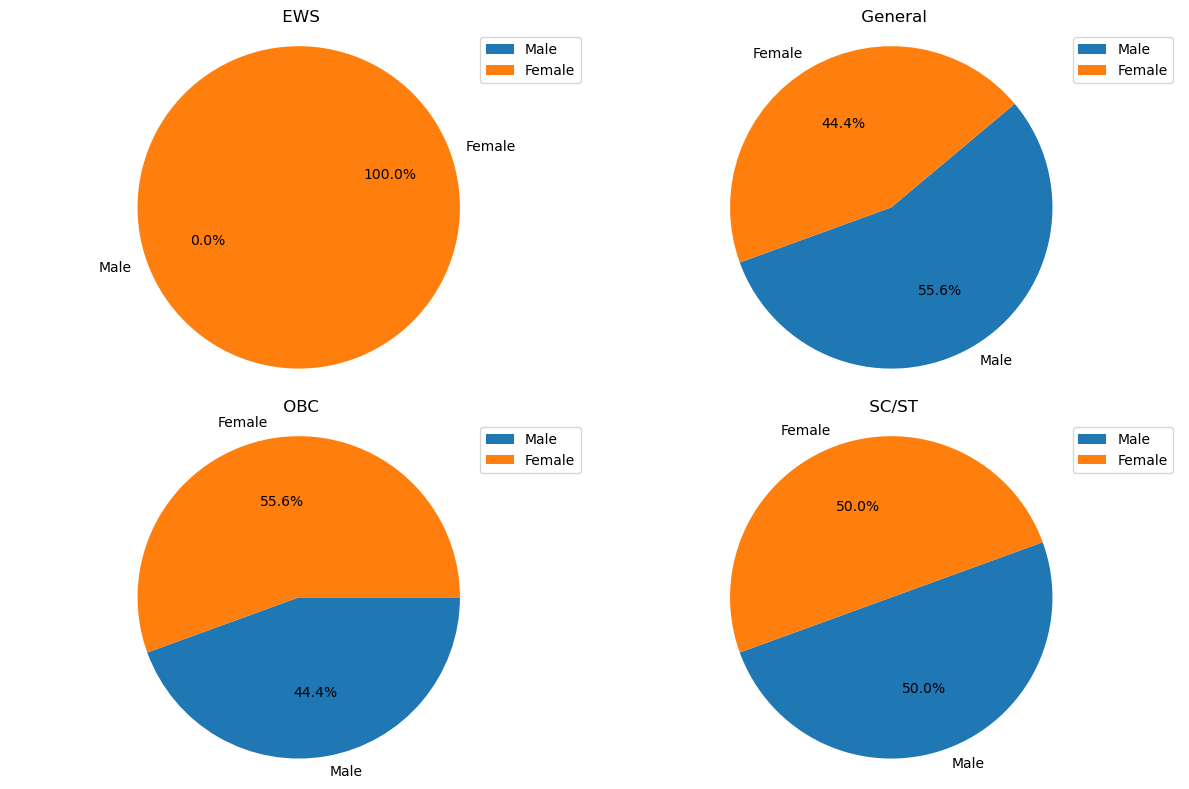

In [20]:
age_counts_by_gender = d.groupby(['Social group\n', 'Gender']).size().reset_index(name='Count')

# Create a dictionary to store the counts for each age
age_counts = {}
for age, gender, count in age_counts_by_gender.values:
    if age not in age_counts:
        age_counts[age] = {'Male': 0, 'Female': 0}
    age_counts[age][gender] = count

# Convert the dictionary to a DataFrame
age_counts_df = pd.DataFrame.from_dict(age_counts, orient='index')

# Calculate the number of rows and columns for the subplot grid
n_rows = 2
n_cols = (len(age_counts_df) + n_rows - 1) // n_rows

# Create subplots with equal aspect ratio
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 8))
fig.subplots_adjust(hspace=0.4)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create a pie chart for each age
for i, (age, counts) in enumerate(age_counts_df.iterrows()):
    ax = axes[i]
    labels = counts.index
    sizes = counts.values
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=200)
    ax.set_title(f' {age}')
    ax.axis('equal')
    ax.legend(patches, labels, loc="upper right")

# Hide any unused subplots
for i in range(len(age_counts_df), n_rows * n_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


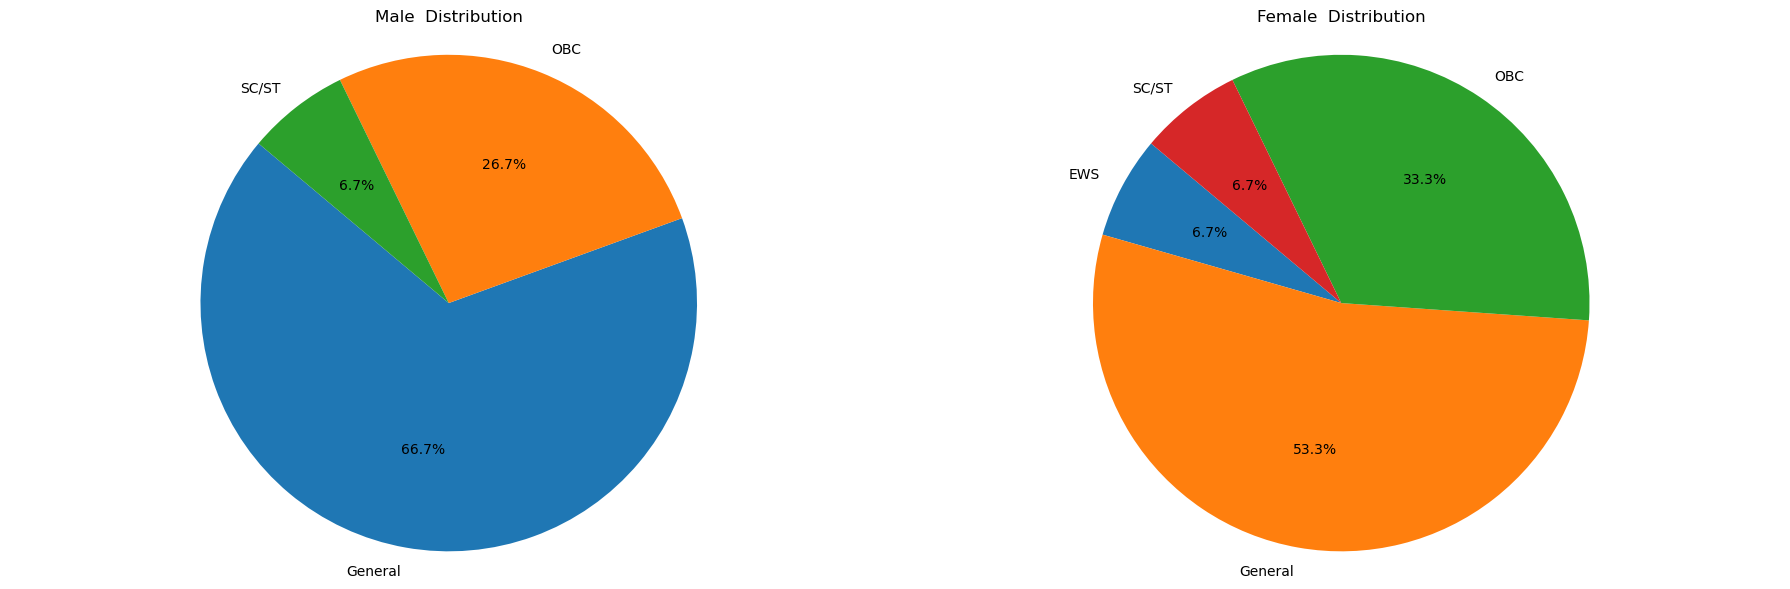

In [21]:
# Group the data by Gender and Age, then count the occurrences
age_counts_by_gender = d.groupby(['Gender', 'Social group\n']).size().reset_index(name='Count')

# Separate the data for each gender
male_age_counts = age_counts_by_gender[age_counts_by_gender['Gender'] == 'Male']
female_age_counts = age_counts_by_gender[age_counts_by_gender['Gender'] == 'Female']

# Create pie plots for each gender
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Male Age Distribution
axes[0].pie(male_age_counts['Count'], labels=male_age_counts['Social group\n'], autopct='%1.1f%%', startangle=140)
axes[0].set_title('Male  Distribution')
axes[0].axis('equal')

# Equal aspect ratio ensures that pie is drawn as a circle.

# Female Age Distribution
axes[1].pie(female_age_counts['Count'], labels=female_age_counts['Social group\n'], autopct='%1.1f%%', startangle=140)
axes[1].set_title('Female  Distribution')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

# APL/BPL

In [22]:
d["Economic group"].value_counts()

Economic group
APL    24
BPL     6
Name: count, dtype: int64

In [23]:
ecnomic_groups_by_gender = d.groupby([ 'Economic group','Gender']).size().reset_index(name='Count')
data=pd.DataFrame(ecnomic_groups_by_gender)
data

,Economic group,Gender,Count
0,APL,Female,13
1,APL,Male,11
2,BPL,Female,2
3,BPL,Male,4


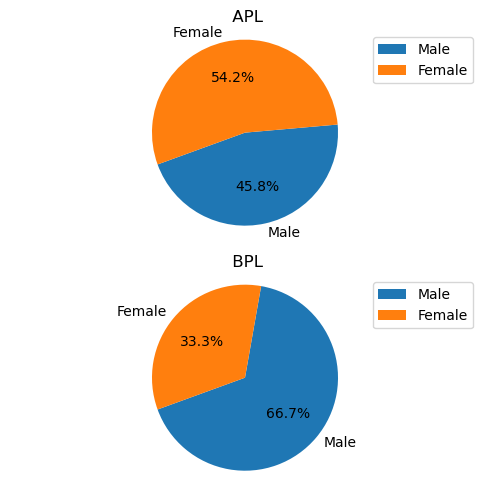

In [24]:
age_counts_by_gender = d.groupby(['Economic group', 'Gender']).size().reset_index(name='Count')

# Create a dictionary to store the counts for each age
age_counts = {}
for age, gender, count in age_counts_by_gender.values:
    if age not in age_counts:
        age_counts[age] = {'Male': 0, 'Female': 0}
    age_counts[age][gender] = count

# Convert the dictionary to a DataFrame
age_counts_df = pd.DataFrame.from_dict(age_counts, orient='index')

# Calculate the number of rows and columns for the subplot grid
n_rows = 2
n_cols = (len(age_counts_df) + n_rows - 1) // n_rows

# Create subplots with equal aspect ratio
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5, 5))
fig.subplots_adjust(hspace=0.4)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create a pie chart for each age
for i, (age, counts) in enumerate(age_counts_df.iterrows()):
    ax = axes[i]
    labels = counts.index
    sizes = counts.values
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=200)
    ax.set_title(f' {age}')
    ax.axis('equal')
    ax.legend(patches, labels, loc="upper right")

# Hide any unused subplots
for i in range(len(age_counts_df), n_rows * n_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


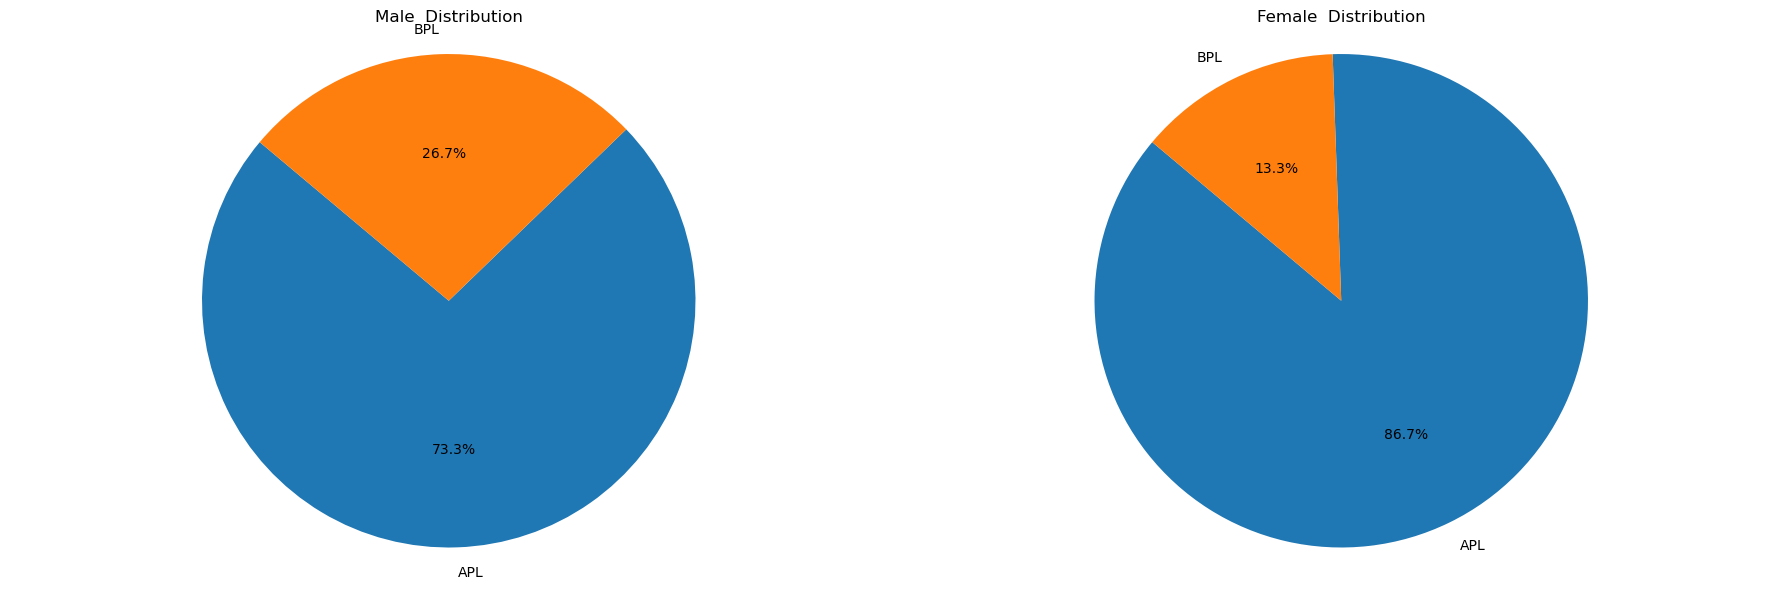

In [25]:
# Group the data by Gender and Age, then count the occurrences
age_counts_by_gender = d.groupby(['Gender', 'Economic group']).size().reset_index(name='Count')

# Separate the data for each gender
male_age_counts = age_counts_by_gender[age_counts_by_gender['Gender'] == 'Male']
female_age_counts = age_counts_by_gender[age_counts_by_gender['Gender'] == 'Female']

# Create pie plots for each gender
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Male Age Distribution
axes[0].pie(male_age_counts['Count'], labels=male_age_counts['Economic group'], autopct='%1.1f%%', startangle=140)
axes[0].set_title('Male  Distribution')
axes[0].axis('equal')

# Equal aspect ratio ensures that pie is drawn as a circle.

# Female Age Distribution
axes[1].pie(female_age_counts['Count'], labels=female_age_counts['Economic group'], autopct='%1.1f%%', startangle=140)
axes[1].set_title('Female  Distribution')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

# Educational Qualification

In [26]:
education_groups_by_gender = d.groupby([ 'Educational Qualification','Gender']).size().reset_index(name='Count')
data=pd.DataFrame(education_groups_by_gender)
data

,Educational Qualification,Gender,Count
0,Degree,Female,5
1,Degree,Male,4
2,PG,Female,5
3,PG,Male,10
4,Professional,Female,5
5,Professional,Male,1


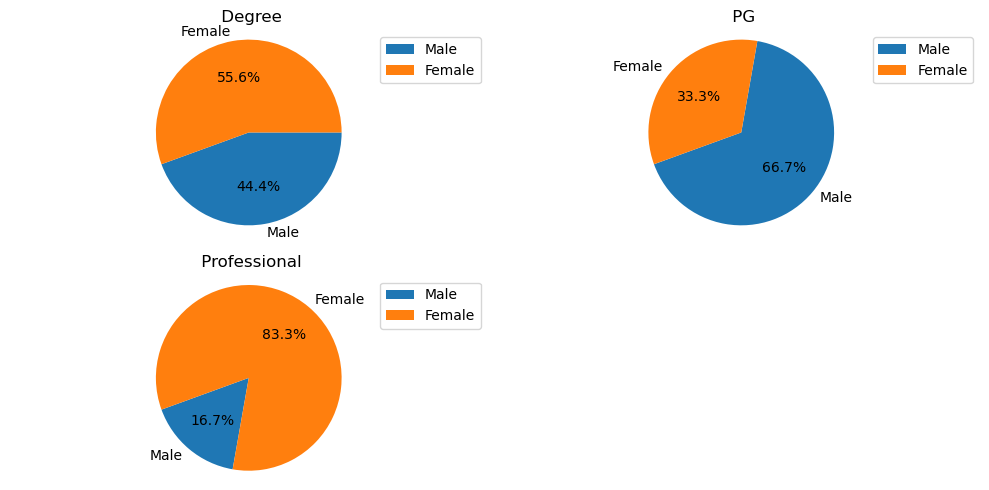

In [27]:
age_counts_by_gender = d.groupby(['Educational Qualification', 'Gender']).size().reset_index(name='Count')

# Create a dictionary to store the counts for each age
age_counts = {}
for age, gender, count in age_counts_by_gender.values:
    if age not in age_counts:
        age_counts[age] = {'Male': 0, 'Female': 0}
    age_counts[age][gender] = count

# Convert the dictionary to a DataFrame
age_counts_df = pd.DataFrame.from_dict(age_counts, orient='index')

# Calculate the number of rows and columns for the subplot grid
n_rows = 2
n_cols = (len(age_counts_df) + n_rows - 1) // n_rows

# Create subplots with equal aspect ratio
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 5))
fig.subplots_adjust(hspace=0.4)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create a pie chart for each age
for i, (age, counts) in enumerate(age_counts_df.iterrows()):
    ax = axes[i]
    labels = counts.index
    sizes = counts.values
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=200)
    ax.set_title(f' {age}')
    ax.axis('equal')
    ax.legend(patches, labels, loc="upper right")

# Hide any unused subplots
for i in range(len(age_counts_df), n_rows * n_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


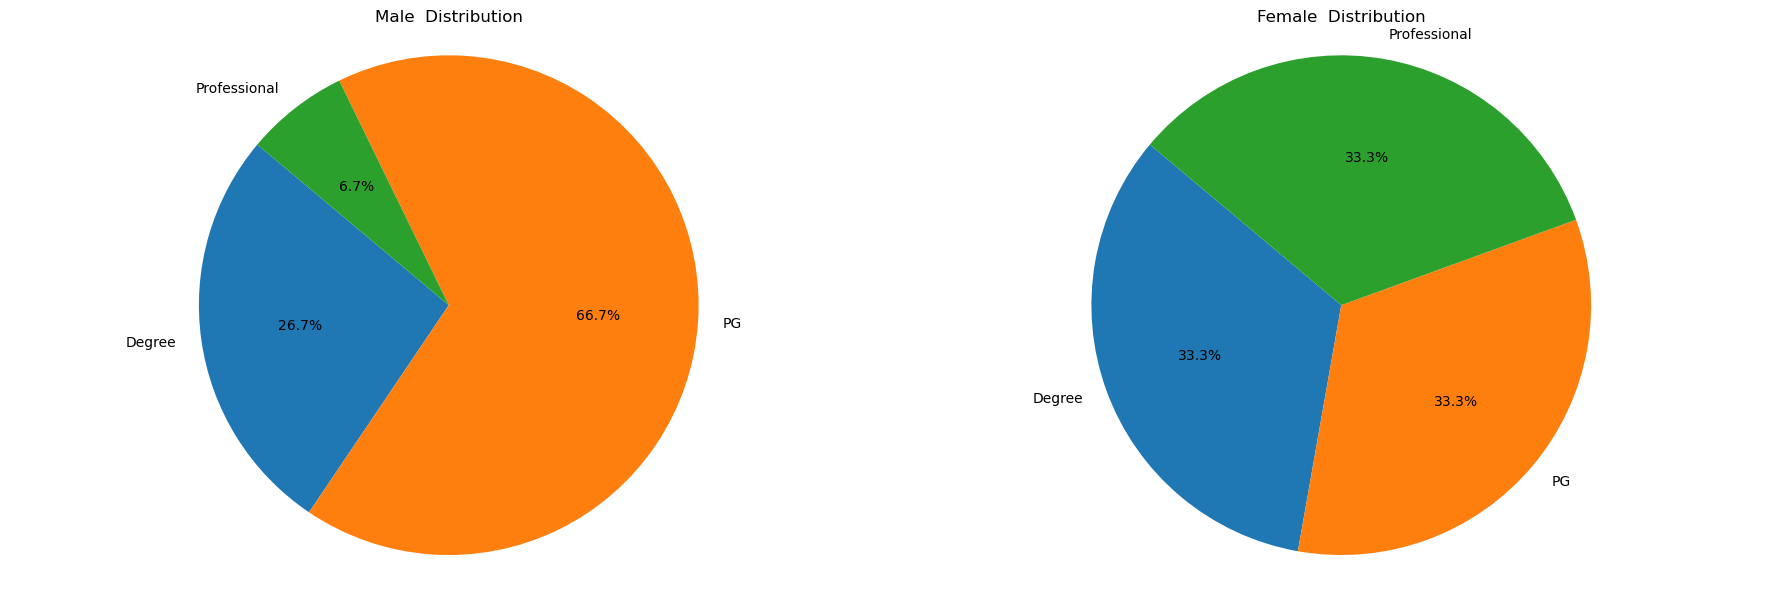

In [28]:
# Group the data by Gender and Age, then count the occurrences
age_counts_by_gender = d.groupby(['Gender', 'Educational Qualification']).size().reset_index(name='Count')

# Separate the data for each gender
male_age_counts = age_counts_by_gender[age_counts_by_gender['Gender'] == 'Male']
female_age_counts = age_counts_by_gender[age_counts_by_gender['Gender'] == 'Female']

# Create pie plots for each gender
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Male Age Distribution
axes[0].pie(male_age_counts['Count'], labels=male_age_counts['Educational Qualification'], autopct='%1.1f%%', startangle=140)
axes[0].set_title('Male  Distribution')
axes[0].axis('equal')

# Equal aspect ratio ensures that pie is drawn as a circle.

# Female Age Distribution
axes[1].pie(female_age_counts['Count'], labels=female_age_counts['Educational Qualification'], autopct='%1.1f%%', startangle=140)
axes[1].set_title('Female  Distribution')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

# Geographical Area

In [29]:
geographical_groups_by_gender = d.groupby([ 'Geographical Area','Gender']).size().reset_index(name='Count')
data=pd.DataFrame(geographical_groups_by_gender)
data

,Geographical Area,Gender,Count
0,Rural,Female,9
1,Rural,Male,9
2,Urban,Female,6
3,Urban,Male,6


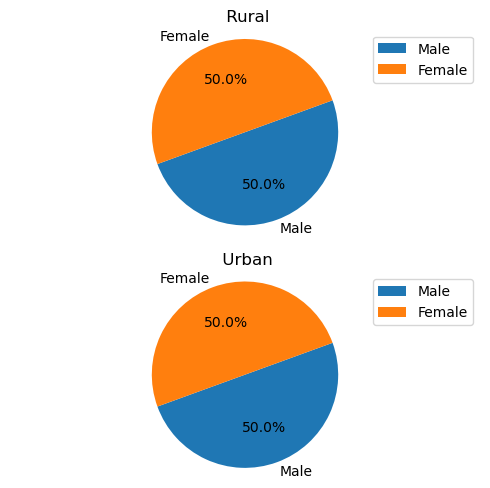

In [30]:
age_counts_by_gender = d.groupby(['Geographical Area', 'Gender']).size().reset_index(name='Count')

# Create a dictionary to store the counts for each age
age_counts = {}
for age, gender, count in age_counts_by_gender.values:
    if age not in age_counts:
        age_counts[age] = {'Male': 0, 'Female': 0}
    age_counts[age][gender] = count

# Convert the dictionary to a DataFrame
age_counts_df = pd.DataFrame.from_dict(age_counts, orient='index')

# Calculate the number of rows and columns for the subplot grid
n_rows = 2
n_cols = (len(age_counts_df) + n_rows - 1) // n_rows

# Create subplots with equal aspect ratio
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5, 5))
fig.subplots_adjust(hspace=0.4)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create a pie chart for each age
for i, (age, counts) in enumerate(age_counts_df.iterrows()):
    ax = axes[i]
    labels = counts.index
    sizes = counts.values
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=200)
    ax.set_title(f' {age}')
    ax.axis('equal')
    ax.legend(patches, labels, loc="upper right")

# Hide any unused subplots
for i in range(len(age_counts_df), n_rows * n_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


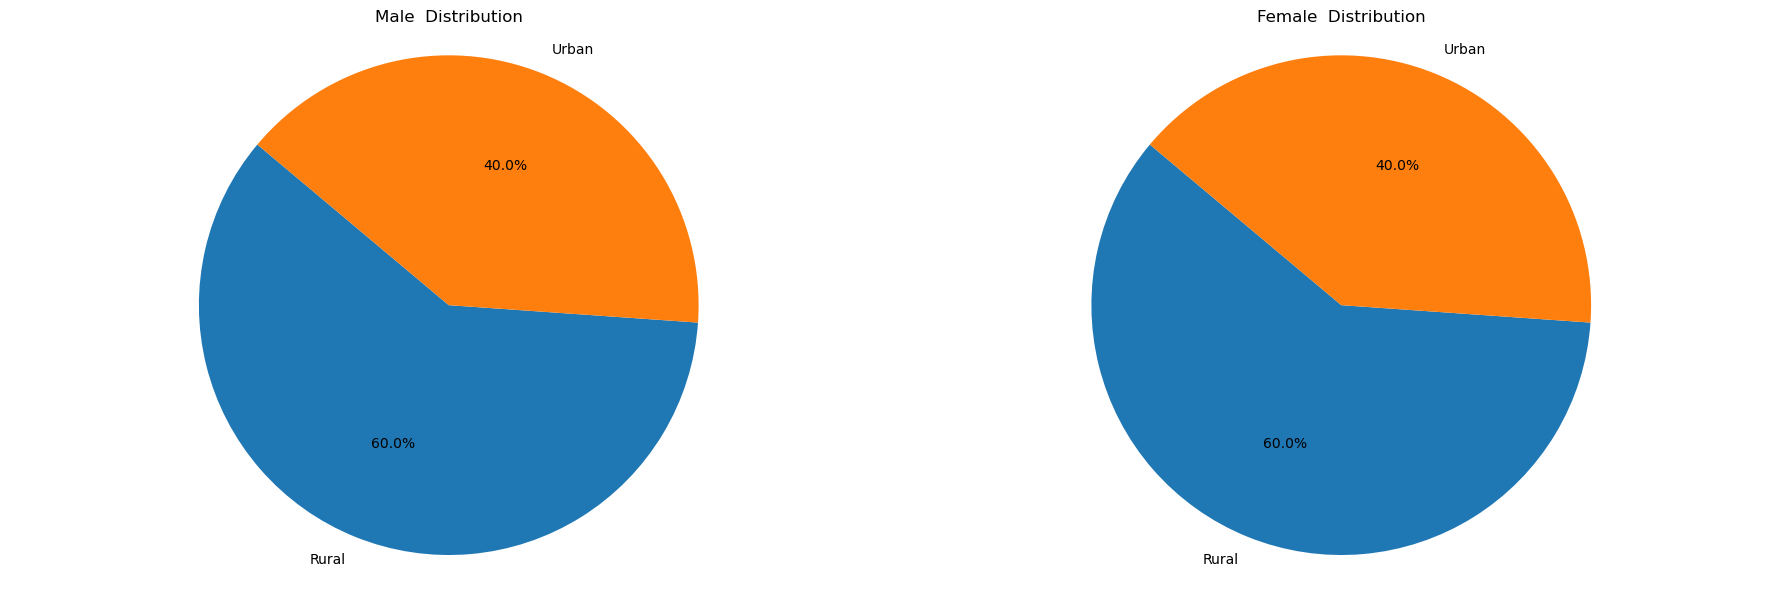

In [31]:
# Group the data by Gender and Age, then count the occurrences
age_counts_by_gender = d.groupby(['Gender', 'Geographical Area']).size().reset_index(name='Count')

# Separate the data for each gender
male_age_counts = age_counts_by_gender[age_counts_by_gender['Gender'] == 'Male']
female_age_counts = age_counts_by_gender[age_counts_by_gender['Gender'] == 'Female']

# Create pie plots for each gender
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Male Age Distribution
axes[0].pie(male_age_counts['Count'], labels=male_age_counts['Geographical Area'], autopct='%1.1f%%', startangle=140)
axes[0].set_title('Male  Distribution')
axes[0].axis('equal')

# Equal aspect ratio ensures that pie is drawn as a circle.

# Female Age Distribution
axes[1].pie(female_age_counts['Count'], labels=female_age_counts['Geographical Area'], autopct='%1.1f%%', startangle=140)
axes[1].set_title('Female  Distribution')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

# Job status

In [32]:
job_status_groups_by_gender = d.groupby([ 'Job Status','Gender']).size().reset_index(name='Count')
data=pd.DataFrame(job_status_groups_by_gender)
data

,Job Status,Gender,Count
0,Public sector employment,Male,2
1,Pvt Employment,Female,5
2,Pvt Employment,Male,3
3,Self employment,Female,2
4,Student,Female,5
5,Student,Male,8
6,Unemployed,Female,3
7,Unemployed,Male,2


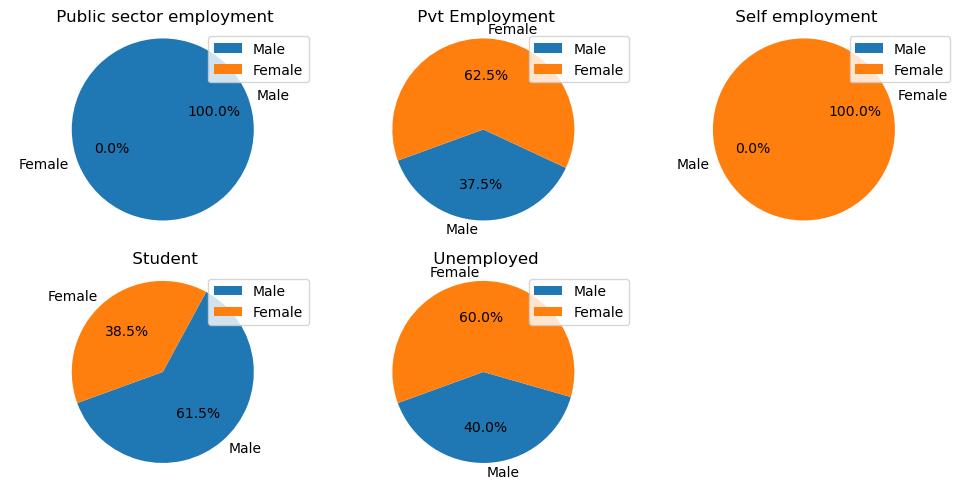

In [33]:
age_counts_by_gender = d.groupby(['Job Status', 'Gender']).size().reset_index(name='Count')

# Create a dictionary to store the counts for each age
age_counts = {}
for age, gender, count in age_counts_by_gender.values:
    if age not in age_counts:
        age_counts[age] = {'Male': 0, 'Female': 0}
    age_counts[age][gender] = count

# Convert the dictionary to a DataFrame
age_counts_df = pd.DataFrame.from_dict(age_counts, orient='index')

# Calculate the number of rows and columns for the subplot grid
n_rows = 2
n_cols = (len(age_counts_df) + n_rows - 1) // n_rows

# Create subplots with equal aspect ratio
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 5))
fig.subplots_adjust(hspace=0.4)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create a pie chart for each age
for i, (age, counts) in enumerate(age_counts_df.iterrows()):
    ax = axes[i]
    labels = counts.index
    sizes = counts.values
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=200)
    ax.set_title(f' {age}')
    ax.axis('equal')
    ax.legend(patches, labels, loc="upper right")

# Hide any unused subplots
for i in range(len(age_counts_df), n_rows * n_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


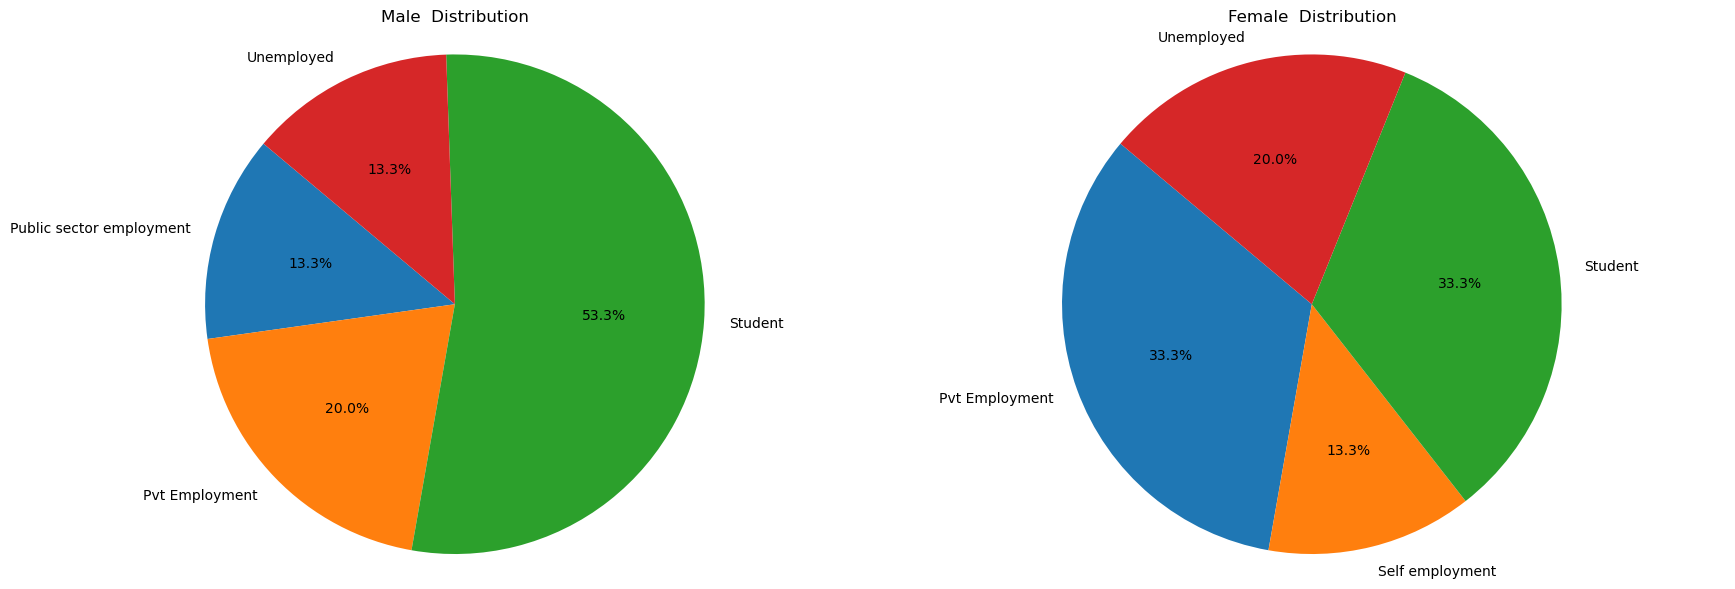

In [34]:
# Group the data by Gender and Age, then count the occurrences
age_counts_by_gender = d.groupby(['Gender', 'Job Status']).size().reset_index(name='Count')

# Separate the data for each gender
male_age_counts = age_counts_by_gender[age_counts_by_gender['Gender'] == 'Male']
female_age_counts = age_counts_by_gender[age_counts_by_gender['Gender'] == 'Female']

# Create pie plots for each gender
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Male Age Distribution
axes[0].pie(male_age_counts['Count'], labels=male_age_counts['Job Status'], autopct='%1.1f%%', startangle=140)
axes[0].set_title('Male  Distribution')
axes[0].axis('equal')

# Equal aspect ratio ensures that pie is drawn as a circle.

# Female Age Distribution
axes[1].pie(female_age_counts['Count'], labels=female_age_counts['Job Status'], autopct='%1.1f%%', startangle=140)
axes[1].set_title('Female  Distribution')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

# Are you aware of the micro credit schemes of the govt

In [35]:
job_status_groups_by_gender = d.groupby([ 'Are you aware of the micro credit schemes of the govt?','Gender']).size().reset_index(name='Count')
data=pd.DataFrame(job_status_groups_by_gender)
data

,Are you aware of the micro credit schemes of the govt?,Gender,Count
0,No,Female,5
1,No,Male,7
2,Somewhat,Female,2
3,Yes,Female,8
4,Yes,Male,8


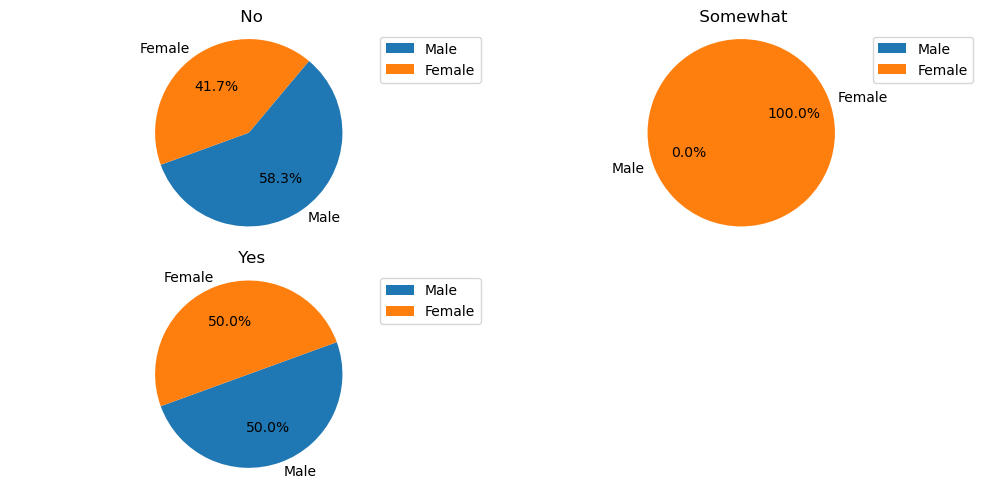

In [36]:
age_counts_by_gender = d.groupby(['Are you aware of the micro credit schemes of the govt?', 'Gender']).size().reset_index(name='Count')

# Create a dictionary to store the counts for each age
age_counts = {}
for age, gender, count in age_counts_by_gender.values:
    if age not in age_counts:
        age_counts[age] = {'Male': 0, 'Female': 0}
    age_counts[age][gender] = count

# Convert the dictionary to a DataFrame
age_counts_df = pd.DataFrame.from_dict(age_counts, orient='index')

# Calculate the number of rows and columns for the subplot grid
n_rows = 2
n_cols = (len(age_counts_df) + n_rows - 1) // n_rows

# Create subplots with equal aspect ratio
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 5))
fig.subplots_adjust(hspace=0.4)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create a pie chart for each age
for i, (age, counts) in enumerate(age_counts_df.iterrows()):
    ax = axes[i]
    labels = counts.index
    sizes = counts.values
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=200)
    ax.set_title(f' {age}')
    ax.axis('equal')
    ax.legend(patches, labels, loc="upper right")

# Hide any unused subplots
for i in range(len(age_counts_df), n_rows * n_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


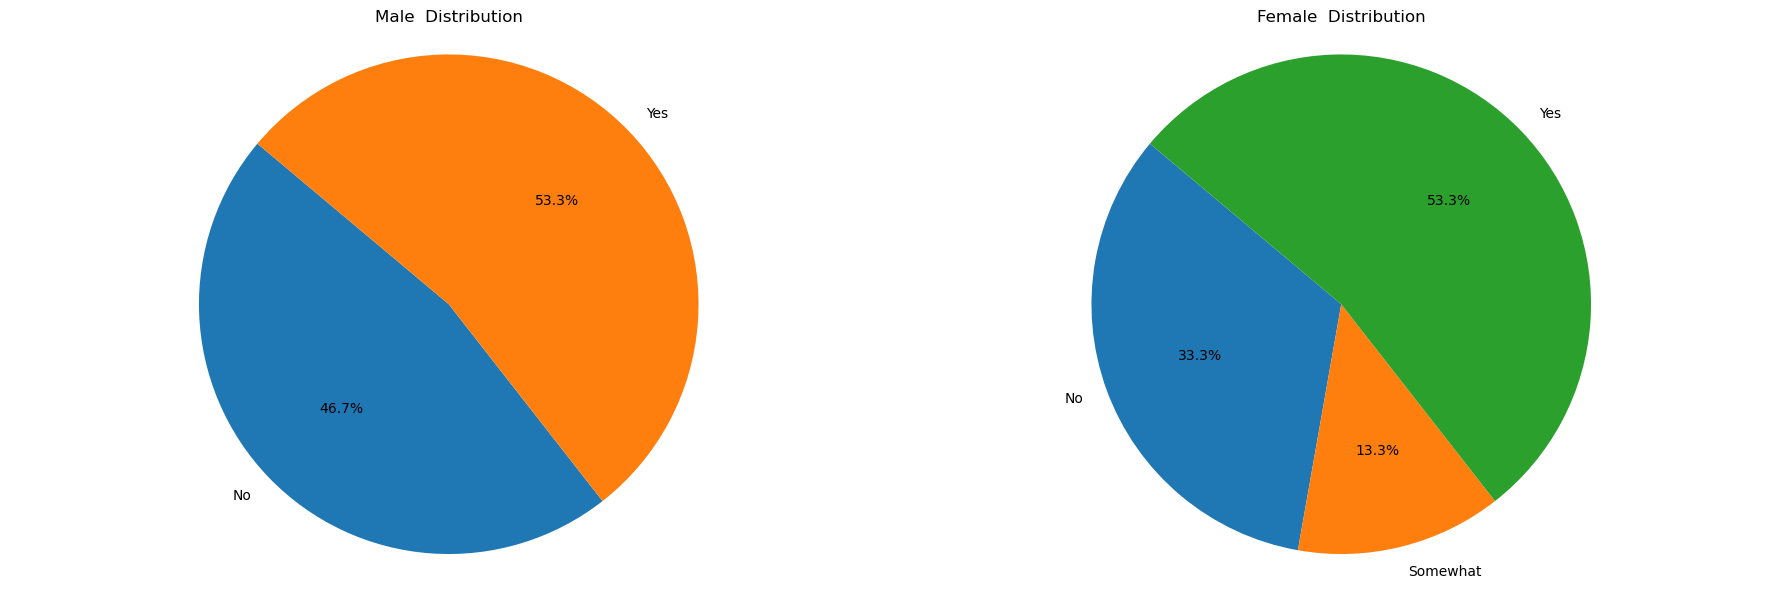

In [37]:
# Group the data by Gender and Age, then count the occurrences
age_counts_by_gender = d.groupby(['Gender', 'Are you aware of the micro credit schemes of the govt?']).size().reset_index(name='Count')

# Separate the data for each gender
male_age_counts = age_counts_by_gender[age_counts_by_gender['Gender'] == 'Male']
female_age_counts = age_counts_by_gender[age_counts_by_gender['Gender'] == 'Female']

# Create pie plots for each gender
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Male Age Distribution
axes[0].pie(male_age_counts['Count'], labels=male_age_counts['Are you aware of the micro credit schemes of the govt?'], autopct='%1.1f%%', startangle=140)
axes[0].set_title('Male  Distribution')
axes[0].axis('equal')

# Equal aspect ratio ensures that pie is drawn as a circle.

# Female Age Distribution
axes[1].pie(female_age_counts['Count'], labels=female_age_counts['Are you aware of the micro credit schemes of the govt?'], autopct='%1.1f%%', startangle=140)
axes[1].set_title('Female  Distribution')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

# If given an opportunity , I will definitely start up a new business. How well do you agree with this statement?

In [38]:
job_status_groups_by_gender = d.groupby([ 'If given an opportunity , I will definitely start up a new business. How well do you agree with this statement?','Gender']).size().reset_index(name='Count')
data=pd.DataFrame(job_status_groups_by_gender)
data

,"If given an opportunity , I will definitely start up a new business. How well do you agree with this statement?",Gender,Count
0,Agree,Female,4
1,Agree,Male,3
2,Disagree,Male,3
3,Neutral,Female,4
4,Neutral,Male,8
5,Strongly agree,Female,4
6,Strongly agree,Male,1
7,Strongly disagree,Female,3


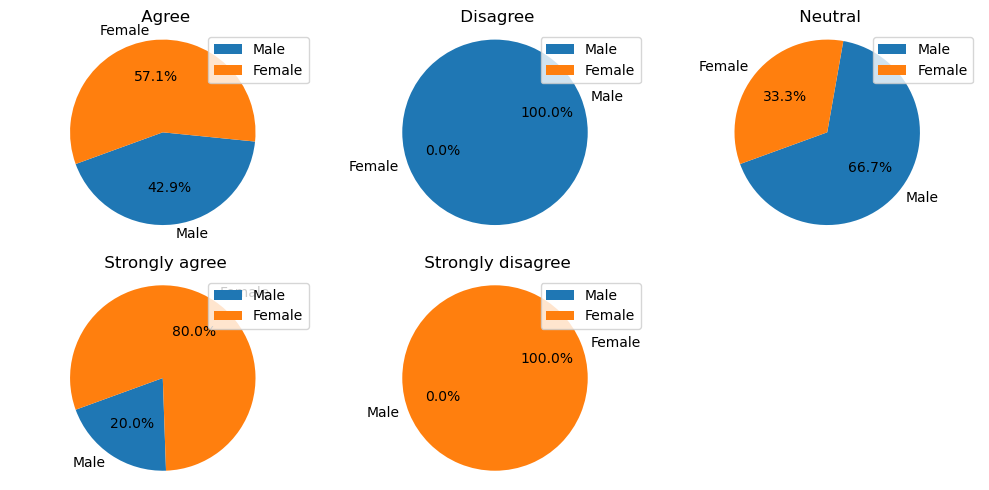

In [39]:
age_counts_by_gender = d.groupby(['If given an opportunity , I will definitely start up a new business. How well do you agree with this statement?', 'Gender']).size().reset_index(name='Count')

# Create a dictionary to store the counts for each age
age_counts = {}
for age, gender, count in age_counts_by_gender.values:
    if age not in age_counts:
        age_counts[age] = {'Male': 0, 'Female': 0}
    age_counts[age][gender] = count

# Convert the dictionary to a DataFrame
age_counts_df = pd.DataFrame.from_dict(age_counts, orient='index')

# Calculate the number of rows and columns for the subplot grid
n_rows = 2
n_cols = (len(age_counts_df) + n_rows - 1) // n_rows

# Create subplots with equal aspect ratio
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 5))
fig.subplots_adjust(hspace=0.4)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create a pie chart for each age
for i, (age, counts) in enumerate(age_counts_df.iterrows()):
    ax = axes[i]
    labels = counts.index
    sizes = counts.values
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=200)
    ax.set_title(f' {age}')
    ax.axis('equal')
    ax.legend(patches, labels, loc="upper right")

# Hide any unused subplots
for i in range(len(age_counts_df), n_rows * n_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


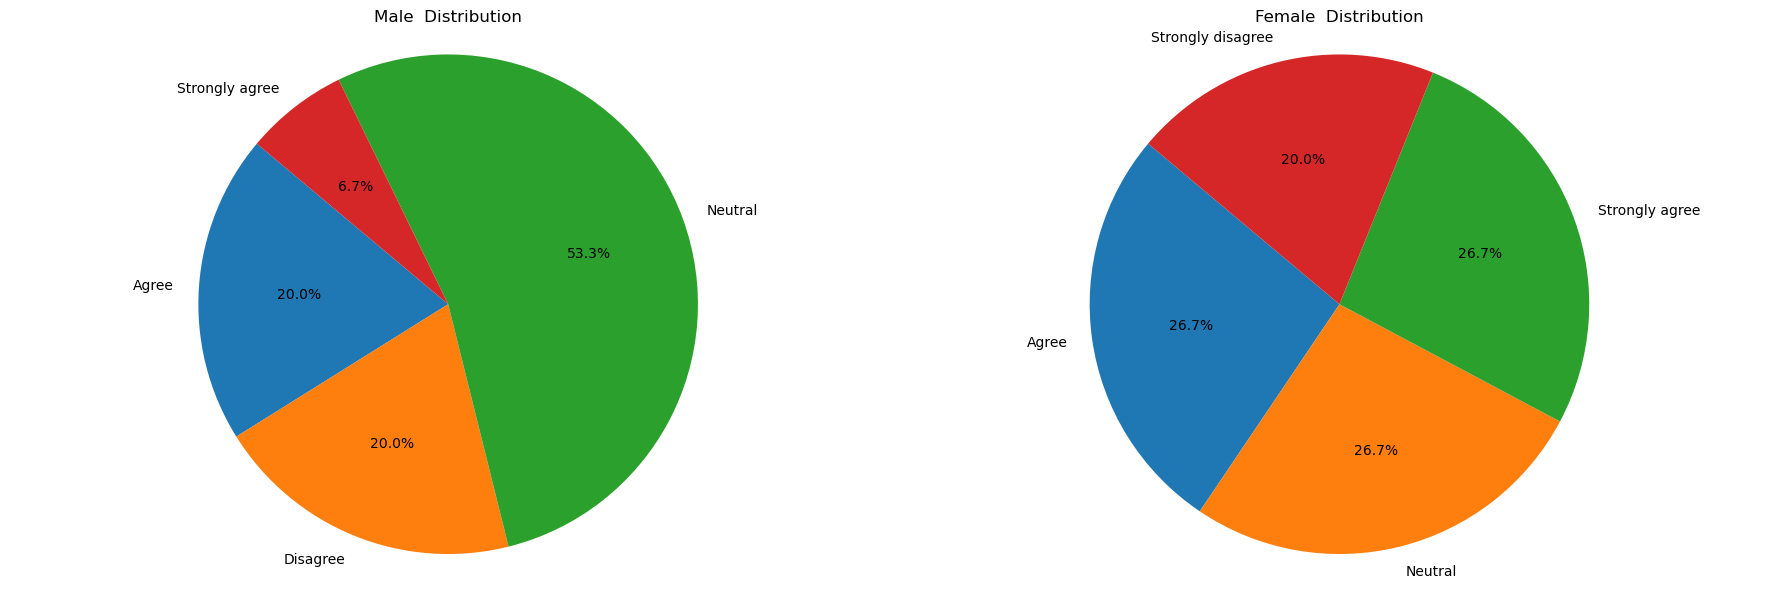

In [40]:
# Group the data by Gender and Age, then count the occurrences
age_counts_by_gender = d.groupby(['Gender', 'If given an opportunity , I will definitely start up a new business. How well do you agree with this statement?']).size().reset_index(name='Count')

# Separate the data for each gender
male_age_counts = age_counts_by_gender[age_counts_by_gender['Gender'] == 'Male']
female_age_counts = age_counts_by_gender[age_counts_by_gender['Gender'] == 'Female']

# Create pie plots for each gender
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Male Age Distribution
axes[0].pie(male_age_counts['Count'], labels=male_age_counts['If given an opportunity , I will definitely start up a new business. How well do you agree with this statement?'], autopct='%1.1f%%', startangle=140)
axes[0].set_title('Male  Distribution')
axes[0].axis('equal')

# Equal aspect ratio ensures that pie is drawn as a circle.

# Female Age Distribution
axes[1].pie(female_age_counts['Count'], labels=female_age_counts['If given an opportunity , I will definitely start up a new business. How well do you agree with this statement?'], autopct='%1.1f%%', startangle=140)
axes[1].set_title('Female  Distribution')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

# Do you own a business?

In [41]:
job_status_groups_by_gender = d.groupby([ "Do you own a business?",'Gender']).size().reset_index(name='Count')
data=pd.DataFrame(job_status_groups_by_gender)
data

,Do you own a business?,Gender,Count
0,No,Female,12
1,No,Male,15
2,Yes,Female,2


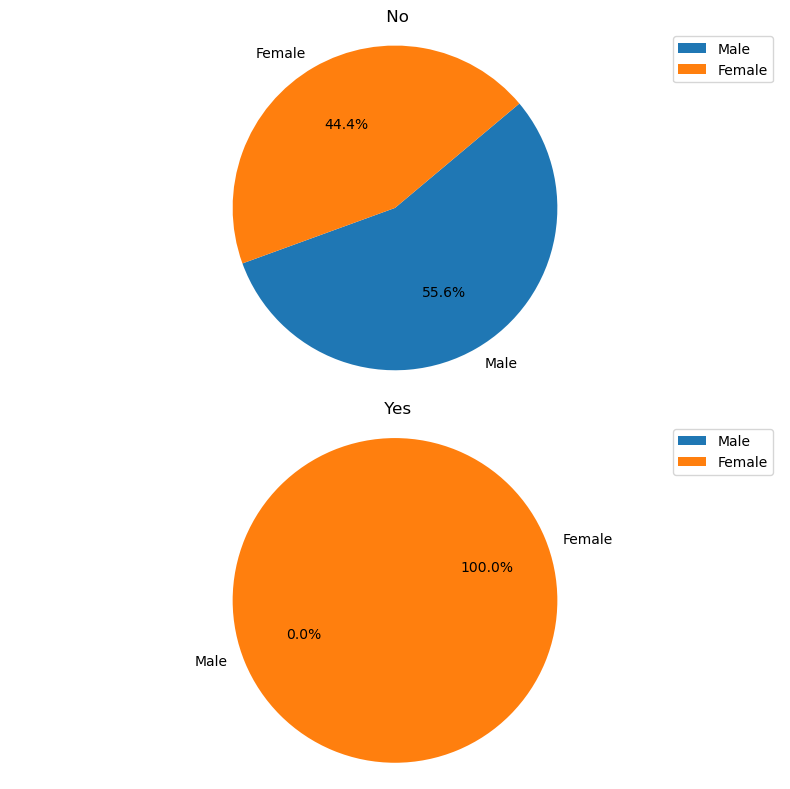

In [42]:
age_counts_by_gender = d.groupby(['Do you own a business?', 'Gender']).size().reset_index(name='Count')

# Create a dictionary to store the counts for each age
age_counts = {}
for age, gender, count in age_counts_by_gender.values:
    if age not in age_counts:
        age_counts[age] = {'Male': 0, 'Female': 0}
    age_counts[age][gender] = count

# Convert the dictionary to a DataFrame
age_counts_df = pd.DataFrame.from_dict(age_counts, orient='index')

# Calculate the number of rows and columns for the subplot grid
n_rows = 2
n_cols = (len(age_counts_df) + n_rows - 1) // n_rows

# Create subplots with equal aspect ratio
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(8,8))
fig.subplots_adjust(hspace=0.4)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create a pie chart for each age
for i, (age, counts) in enumerate(age_counts_df.iterrows()):
    ax = axes[i]
    labels = counts.index
    sizes = counts.values
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=200)
    ax.set_title(f' {age}')
    ax.axis('equal')
    ax.legend(patches, labels, loc="upper right")

# Hide any unused subplots
for i in range(len(age_counts_df), n_rows * n_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


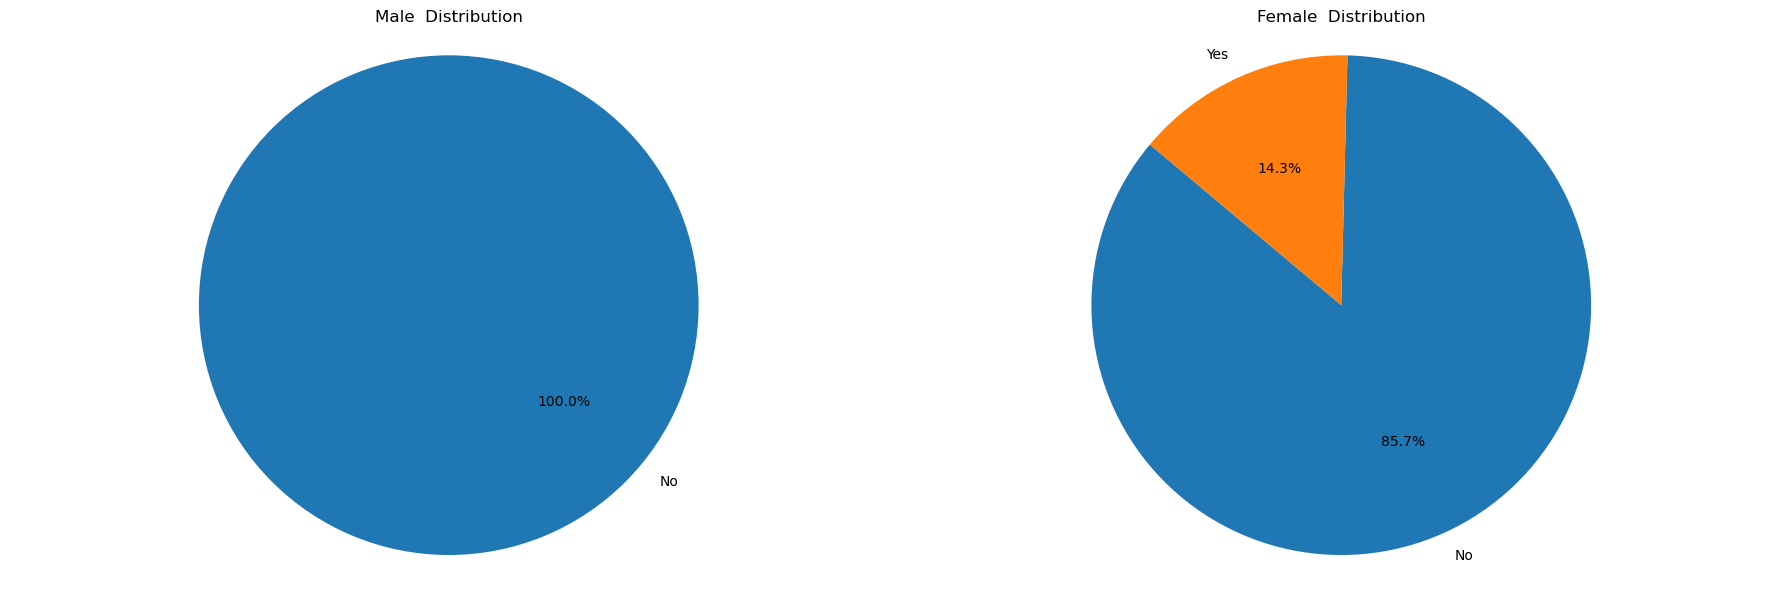

In [43]:
# Group the data by Gender and Age, then count the occurrences
age_counts_by_gender = d.groupby(['Gender', 'Do you own a business?']).size().reset_index(name='Count')

# Separate the data for each gender
male_age_counts = age_counts_by_gender[age_counts_by_gender['Gender'] == 'Male']
female_age_counts = age_counts_by_gender[age_counts_by_gender['Gender'] == 'Female']

# Create pie plots for each gender
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Male Age Distribution
axes[0].pie(male_age_counts['Count'], labels=male_age_counts['Do you own a business?'], autopct='%1.1f%%', startangle=140)
axes[0].set_title('Male  Distribution')
axes[0].axis('equal')

# Equal aspect ratio ensures that pie is drawn as a circle.

# Female Age Distribution
axes[1].pie(female_age_counts['Count'], labels=female_age_counts['Do you own a business?'], autopct='%1.1f%%', startangle=140)
axes[1].set_title('Female  Distribution')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

# Does any one of your family members own any business ?

In [44]:
job_status_groups_by_gender = d.groupby([ "Does any one of your family members own any business ?",'Gender']).size().reset_index(name='Count')
data=pd.DataFrame(job_status_groups_by_gender)
data

,Does any one of your family members own any business ?,Gender,Count
0,No,Female,8
1,No,Male,9
2,Yes,Female,7
3,Yes,Male,6


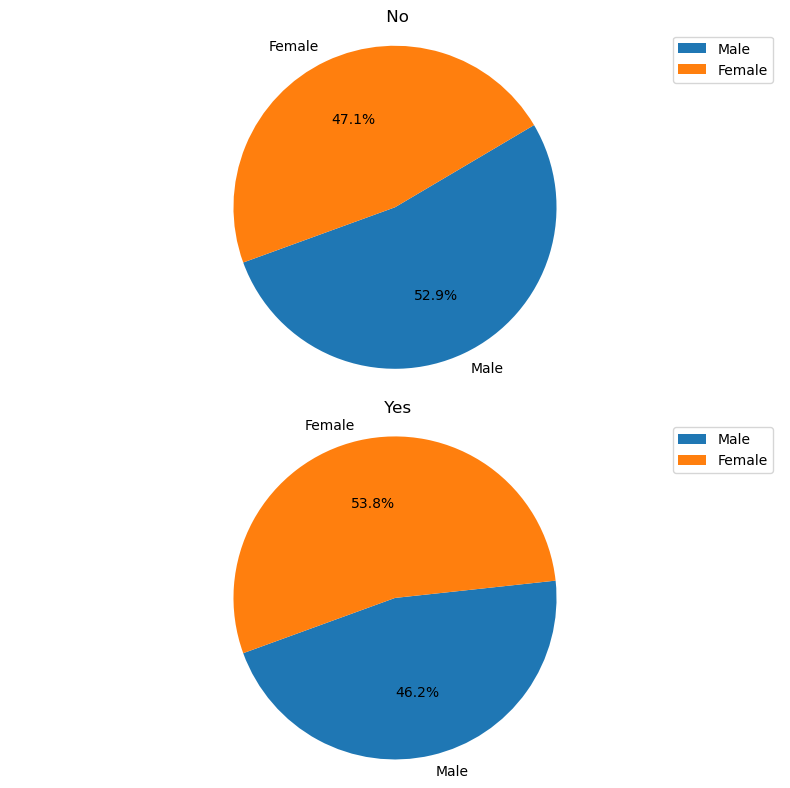

In [45]:
age_counts_by_gender = d.groupby(['Does any one of your family members own any business ?', 'Gender']).size().reset_index(name='Count')

# Create a dictionary to store the counts for each age
age_counts = {}
for age, gender, count in age_counts_by_gender.values:
    if age not in age_counts:
        age_counts[age] = {'Male': 0, 'Female': 0}
    age_counts[age][gender] = count

# Convert the dictionary to a DataFrame
age_counts_df = pd.DataFrame.from_dict(age_counts, orient='index')

# Calculate the number of rows and columns for the subplot grid
n_rows = 2
n_cols = (len(age_counts_df) + n_rows - 1) // n_rows

# Create subplots with equal aspect ratio
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(8,8))
fig.subplots_adjust(hspace=0.4)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create a pie chart for each age
for i, (age, counts) in enumerate(age_counts_df.iterrows()):
    ax = axes[i]
    labels = counts.index
    sizes = counts.values
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=200)
    ax.set_title(f' {age}')
    ax.axis('equal')
    ax.legend(patches, labels, loc="upper right")

# Hide any unused subplots
for i in range(len(age_counts_df), n_rows * n_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


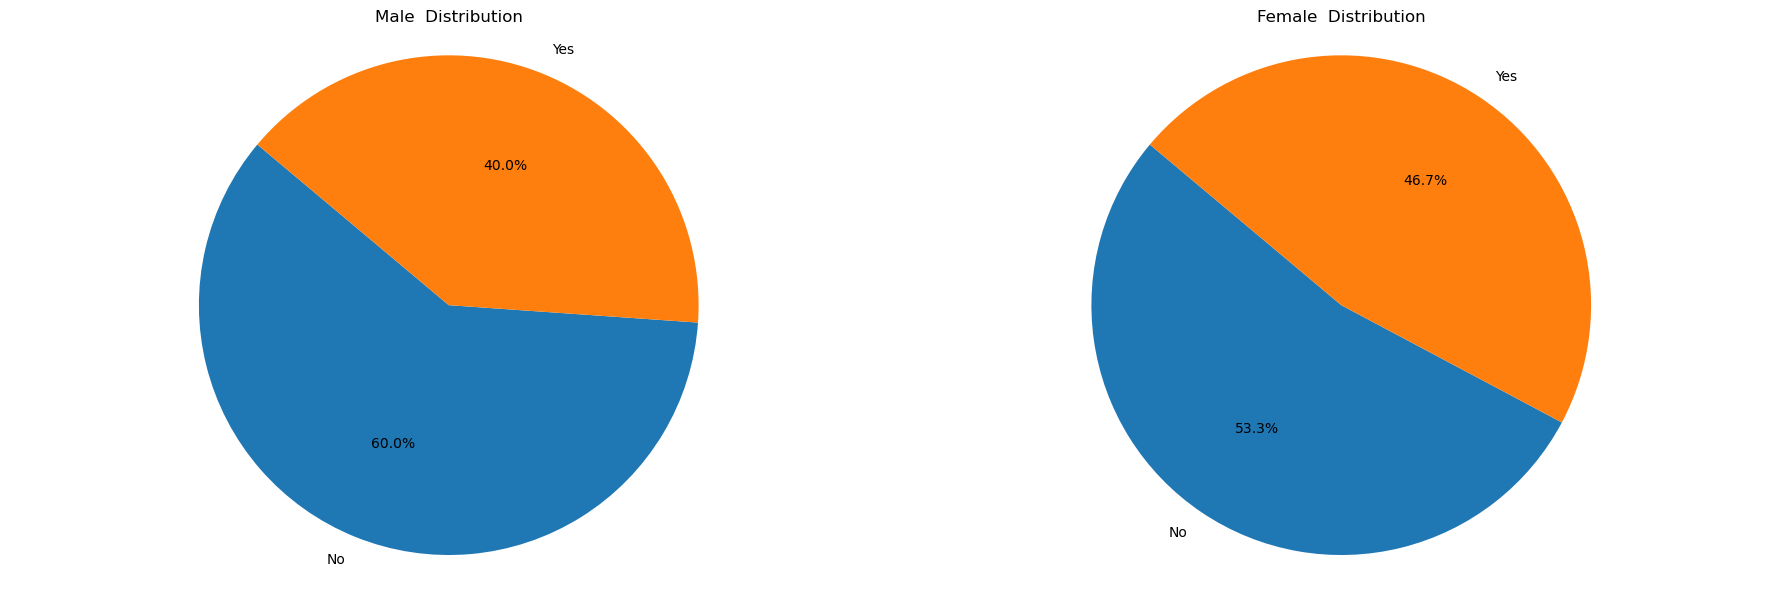

In [46]:
# Group the data by Gender and Age, then count the occurrences
age_counts_by_gender = d.groupby(['Gender', 'Does any one of your family members own any business ?']).size().reset_index(name='Count')

# Separate the data for each gender
male_age_counts = age_counts_by_gender[age_counts_by_gender['Gender'] == 'Male']
female_age_counts = age_counts_by_gender[age_counts_by_gender['Gender'] == 'Female']

# Create pie plots for each gender
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Male Age Distribution
axes[0].pie(male_age_counts['Count'], labels=male_age_counts['Does any one of your family members own any business ?'], autopct='%1.1f%%', startangle=140)
axes[0].set_title('Male  Distribution')
axes[0].axis('equal')

# Equal aspect ratio ensures that pie is drawn as a circle.

# Female Age Distribution
axes[1].pie(female_age_counts['Count'], labels=female_age_counts['Does any one of your family members own any business ?'], autopct='%1.1f%%', startangle=140)
axes[1].set_title('Female  Distribution')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

# Are you interested in taking up business as a full time income generation tool?

In [47]:
job_status_groups_by_gender = d.groupby([ "Are you interested in taking up business as a full time income generation tool?",'Gender']).size().reset_index(name='Count')
data=pd.DataFrame(job_status_groups_by_gender)
data

,Are you interested in taking up business as a full time income generation tool?,Gender,Count
0,Maybe,Female,8
1,Maybe,Male,6
2,No,Female,2
3,No,Male,8
4,Yes,Female,5
5,Yes,Male,1


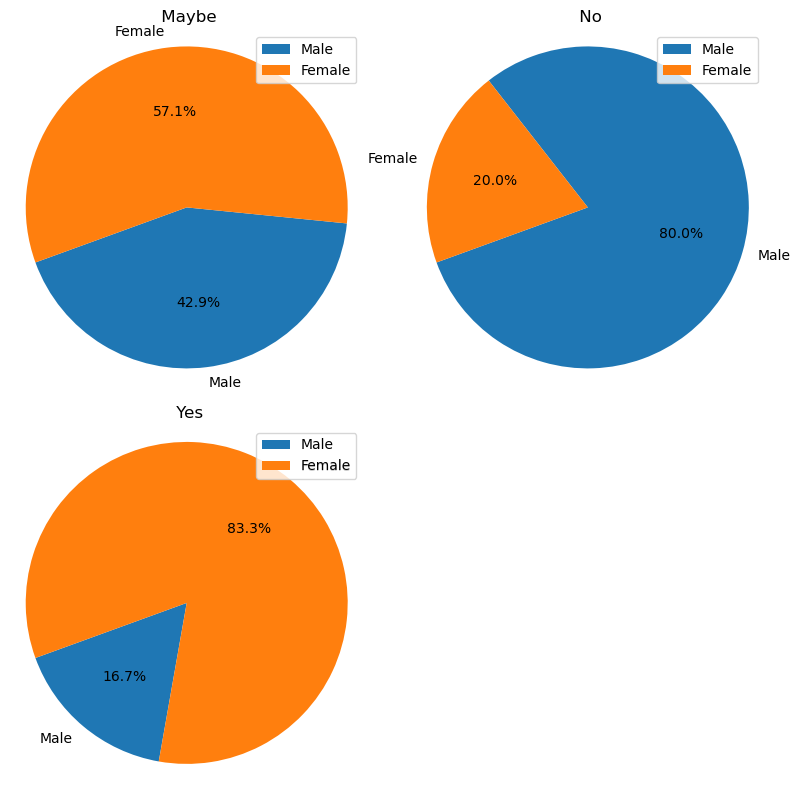

In [48]:
age_counts_by_gender = d.groupby(['Are you interested in taking up business as a full time income generation tool?', 'Gender']).size().reset_index(name='Count')

# Create a dictionary to store the counts for each age
age_counts = {}
for age, gender, count in age_counts_by_gender.values:
    if age not in age_counts:
        age_counts[age] = {'Male': 0, 'Female': 0}
    age_counts[age][gender] = count

# Convert the dictionary to a DataFrame
age_counts_df = pd.DataFrame.from_dict(age_counts, orient='index')

# Calculate the number of rows and columns for the subplot grid
n_rows = 2
n_cols = (len(age_counts_df) + n_rows - 1) // n_rows

# Create subplots with equal aspect ratio
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(8,8))
fig.subplots_adjust(hspace=0.4)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create a pie chart for each age
for i, (age, counts) in enumerate(age_counts_df.iterrows()):
    ax = axes[i]
    labels = counts.index
    sizes = counts.values
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=200)
    ax.set_title(f' {age}')
    ax.axis('equal')
    ax.legend(patches, labels, loc="upper right")

# Hide any unused subplots
for i in range(len(age_counts_df), n_rows * n_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


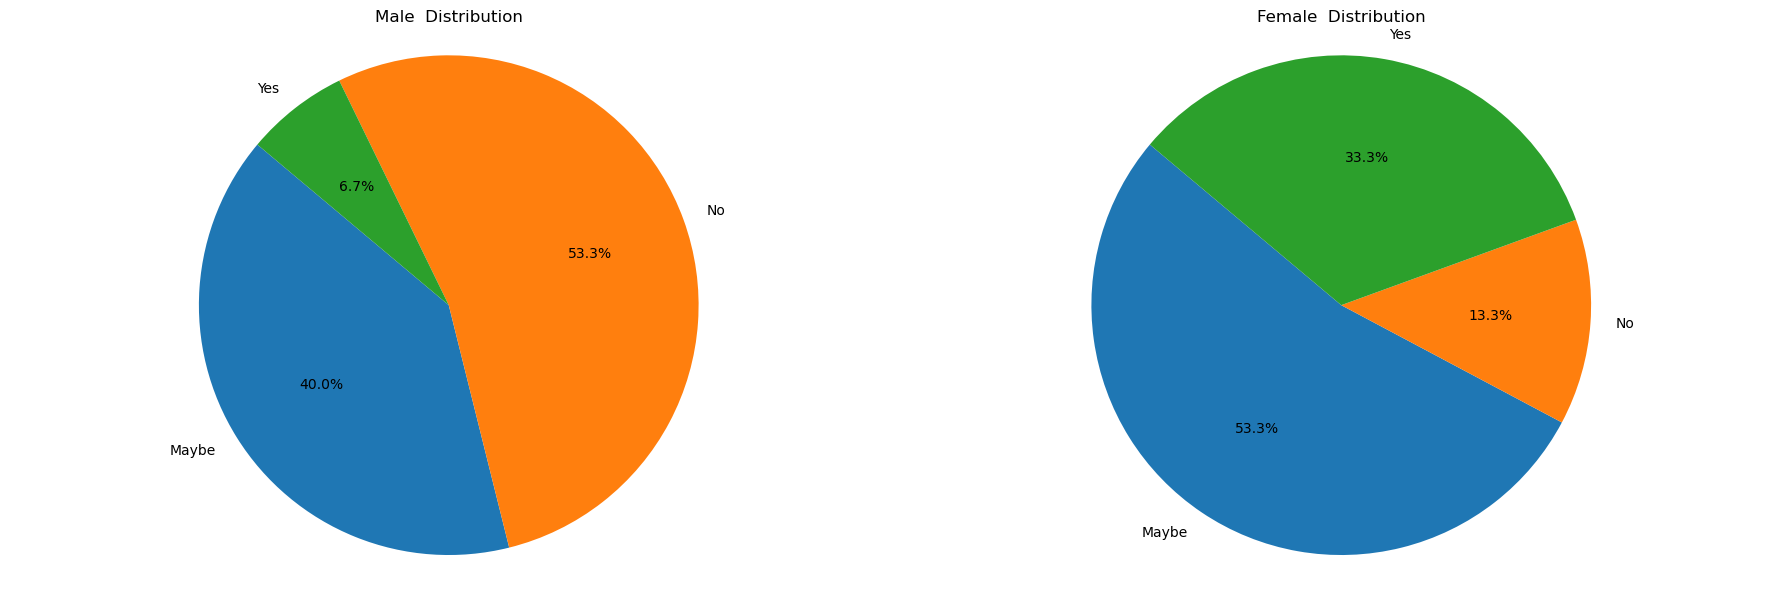

In [49]:
# Group the data by Gender and Age, then count the occurrences
age_counts_by_gender = d.groupby(['Gender', 'Are you interested in taking up business as a full time income generation tool?']).size().reset_index(name='Count')

# Separate the data for each gender
male_age_counts = age_counts_by_gender[age_counts_by_gender['Gender'] == 'Male']
female_age_counts = age_counts_by_gender[age_counts_by_gender['Gender'] == 'Female']

# Create pie plots for each gender
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Male Age Distribution
axes[0].pie(male_age_counts['Count'], labels=male_age_counts['Are you interested in taking up business as a full time income generation tool?'], autopct='%1.1f%%', startangle=140)
axes[0].set_title('Male  Distribution')
axes[0].axis('equal')

# Equal aspect ratio ensures that pie is drawn as a circle.

# Female Age Distribution
axes[1].pie(female_age_counts['Count'], labels=female_age_counts['Are you interested in taking up business as a full time income generation tool?'], autopct='%1.1f%%', startangle=140)
axes[1].set_title('Female  Distribution')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

# Do you prefer to take up business as a secondary activity?

In [50]:
job_status_groups_by_gender = d.groupby([ "Do you prefer to take up business as a secondary activity?",'Gender']).size().reset_index(name='Count')
data=pd.DataFrame(job_status_groups_by_gender)
data

,Do you prefer to take up business as a secondary activity?,Gender,Count
0,Maybe,Female,3
1,Maybe,Male,3
2,No,Female,1
3,No,Male,3
4,Yes,Female,11
5,Yes,Male,9


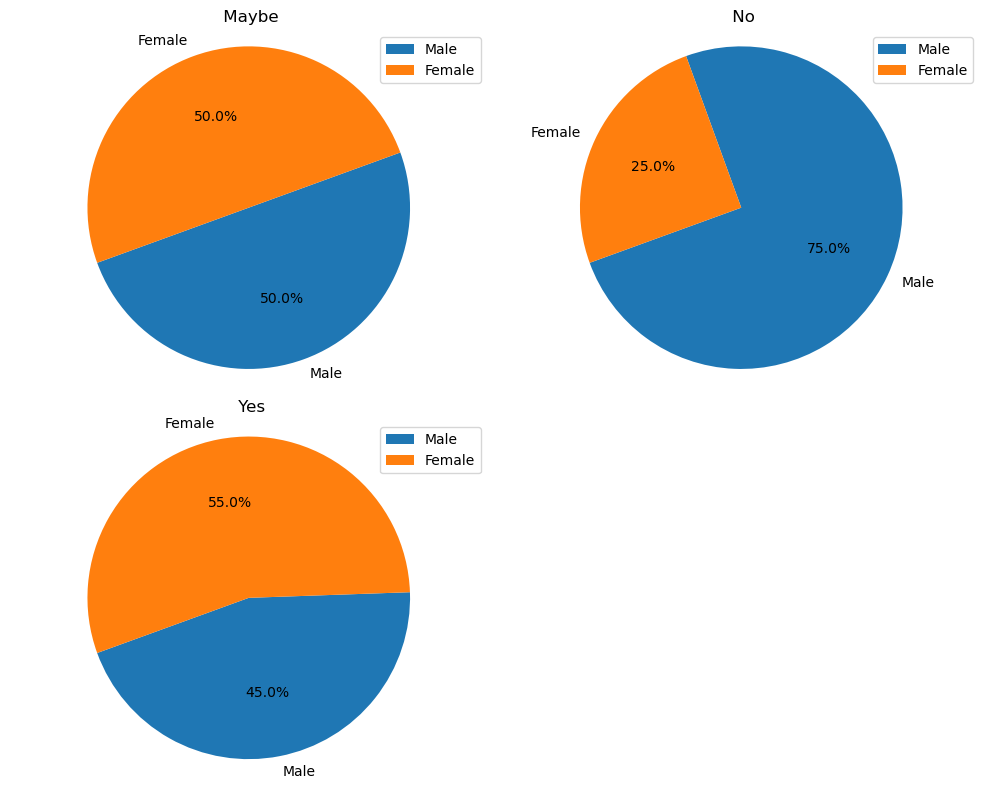

In [51]:
age_counts_by_gender = d.groupby(['Do you prefer to take up business as a secondary activity?', 'Gender']).size().reset_index(name='Count')

# Create a dictionary to store the counts for each age
age_counts = {}
for age, gender, count in age_counts_by_gender.values:
    if age not in age_counts:
        age_counts[age] = {'Male': 0, 'Female': 0}
    age_counts[age][gender] = count

# Convert the dictionary to a DataFrame
age_counts_df = pd.DataFrame.from_dict(age_counts, orient='index')

# Calculate the number of rows and columns for the subplot grid
n_rows = 2
n_cols = (len(age_counts_df) + n_rows - 1) // n_rows

# Create subplots with equal aspect ratio
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10,8))
fig.subplots_adjust(hspace=0.4)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create a pie chart for each age
for i, (age, counts) in enumerate(age_counts_df.iterrows()):
    ax = axes[i]
    labels = counts.index
    sizes = counts.values
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=200)
    ax.set_title(f' {age}')
    ax.axis('equal')
    ax.legend(patches, labels, loc="upper right")

# Hide any unused subplots
for i in range(len(age_counts_df), n_rows * n_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


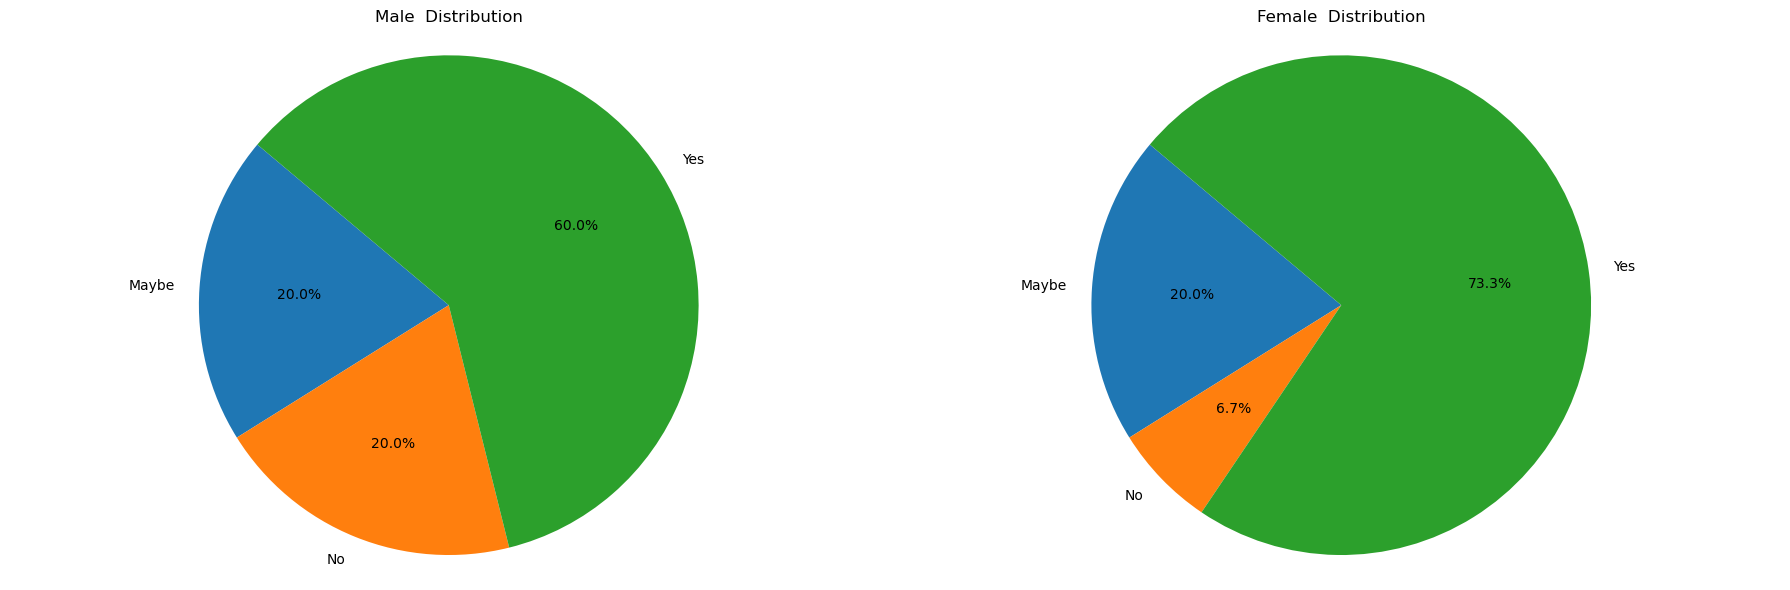

In [52]:
# Group the data by Gender and Age, then count the occurrences
age_counts_by_gender = d.groupby(['Gender', 'Do you prefer to take up business as a secondary activity?']).size().reset_index(name='Count')

# Separate the data for each gender
male_age_counts = age_counts_by_gender[age_counts_by_gender['Gender'] == 'Male']
female_age_counts = age_counts_by_gender[age_counts_by_gender['Gender'] == 'Female']

# Create pie plots for each gender
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Male Age Distribution
axes[0].pie(male_age_counts['Count'], labels=male_age_counts['Do you prefer to take up business as a secondary activity?'], autopct='%1.1f%%', startangle=140)
axes[0].set_title('Male  Distribution')
axes[0].axis('equal')

# Equal aspect ratio ensures that pie is drawn as a circle.

# Female Age Distribution
axes[1].pie(female_age_counts['Count'], labels=female_age_counts['Do you prefer to take up business as a secondary activity?'], autopct='%1.1f%%', startangle=140)
axes[1].set_title('Female  Distribution')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

# What kind of business ownership do you prefer?

In [53]:
job_status_groups_by_gender = d.groupby([ "What kind of business ownership do you prefer?",'Gender']).size().reset_index(name='Count')
data=pd.DataFrame(job_status_groups_by_gender)
data

,What kind of business ownership do you prefer?,Gender,Count
0,Family Enterprises,Female,3
1,Family Enterprises,Male,2
2,Partnership,Female,3
3,Partnership,Male,5
4,Private company,Female,5
5,Private company,Male,2
6,Public Ltd Company,Male,1
7,Sole Trader,Female,4
8,Sole Trader,Male,5


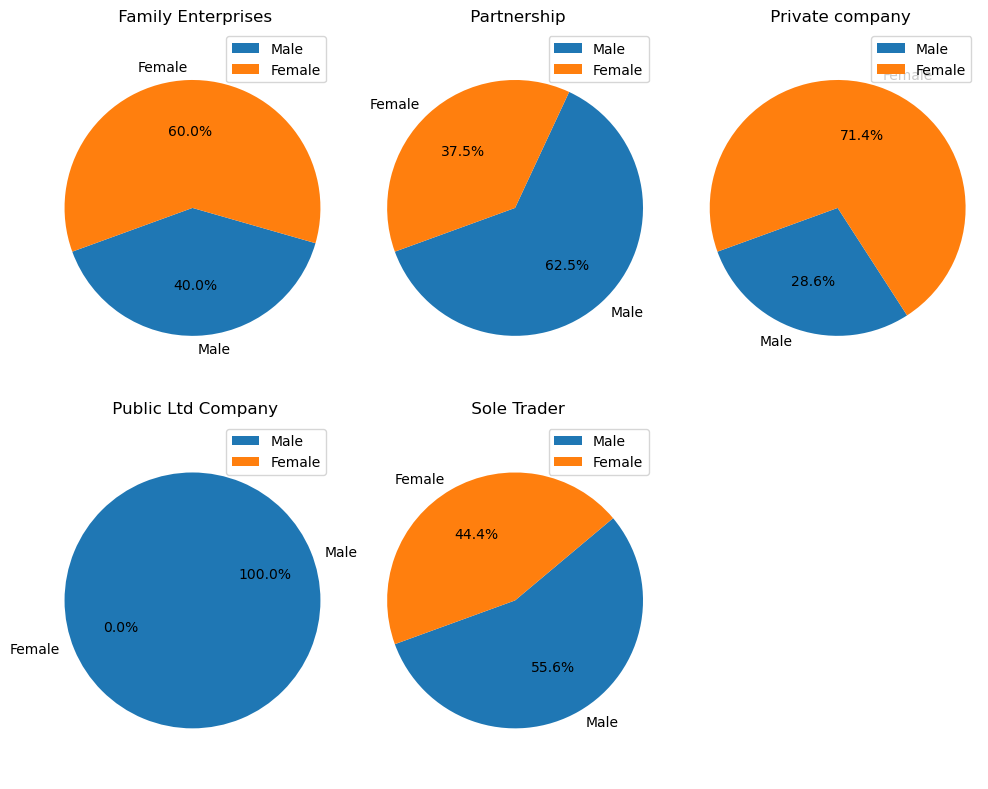

In [54]:
age_counts_by_gender = d.groupby(['What kind of business ownership do you prefer?', 'Gender']).size().reset_index(name='Count')

# Create a dictionary to store the counts for each age
age_counts = {}
for age, gender, count in age_counts_by_gender.values:
    if age not in age_counts:
        age_counts[age] = {'Male': 0, 'Female': 0}
    age_counts[age][gender] = count

# Convert the dictionary to a DataFrame
age_counts_df = pd.DataFrame.from_dict(age_counts, orient='index')

# Calculate the number of rows and columns for the subplot grid
n_rows = 2
n_cols = (len(age_counts_df) + n_rows - 1) // n_rows

# Create subplots with equal aspect ratio
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10,8))
fig.subplots_adjust(hspace=0.4)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create a pie chart for each age
for i, (age, counts) in enumerate(age_counts_df.iterrows()):
    ax = axes[i]
    labels = counts.index
    sizes = counts.values
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=200)
    ax.set_title(f' {age}')
    ax.axis('equal')
    ax.legend(patches, labels, loc="upper right")

# Hide any unused subplots
for i in range(len(age_counts_df), n_rows * n_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


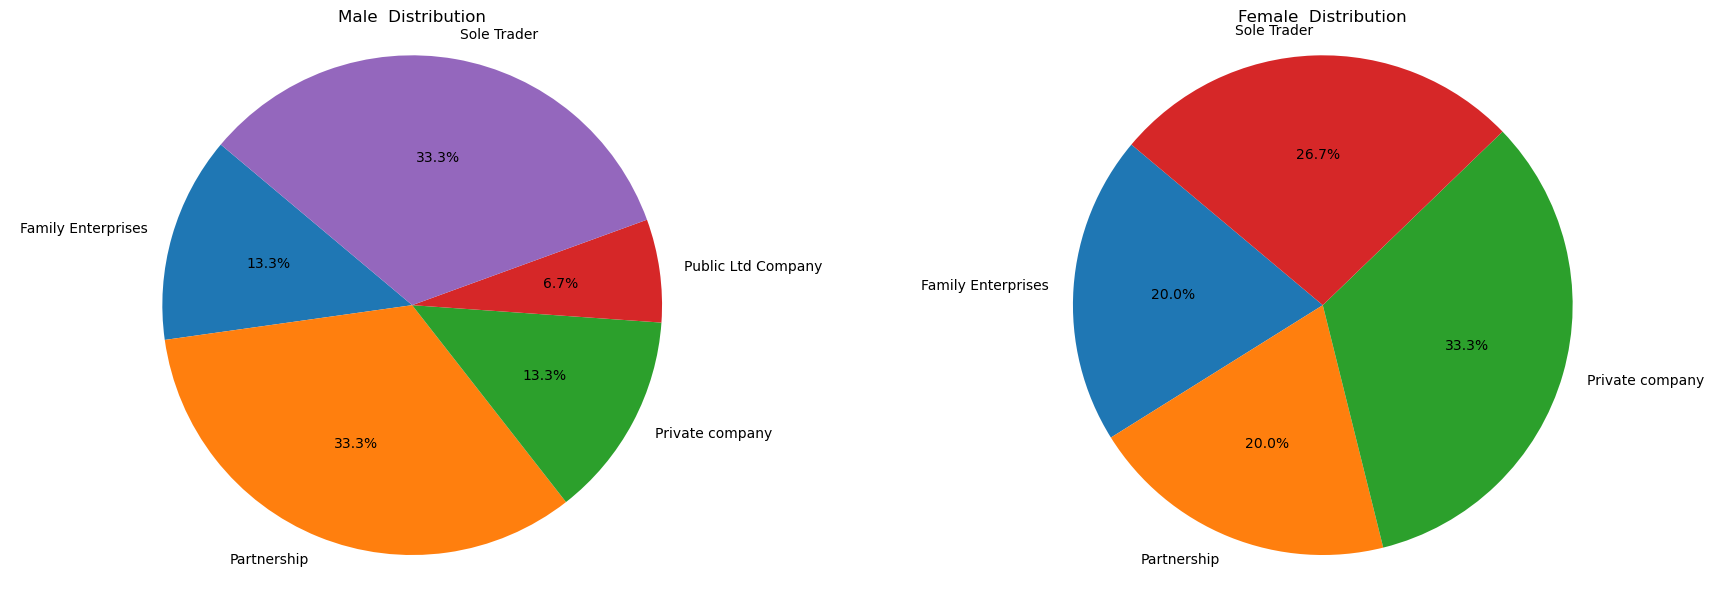

In [55]:
# Group the data by Gender and Age, then count the occurrences
age_counts_by_gender = d.groupby(['Gender', 'What kind of business ownership do you prefer?']).size().reset_index(name='Count')

# Separate the data for each gender
male_age_counts = age_counts_by_gender[age_counts_by_gender['Gender'] == 'Male']
female_age_counts = age_counts_by_gender[age_counts_by_gender['Gender'] == 'Female']

# Create pie plots for each gender
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Male Age Distribution
axes[0].pie(male_age_counts['Count'], labels=male_age_counts['What kind of business ownership do you prefer?'], autopct='%1.1f%%', startangle=140)
axes[0].set_title('Male  Distribution')
axes[0].axis('equal')

# Equal aspect ratio ensures that pie is drawn as a circle.

# Female Age Distribution
axes[1].pie(female_age_counts['Count'], labels=female_age_counts['What kind of business ownership do you prefer?'], autopct='%1.1f%%', startangle=140)
axes[1].set_title('Female  Distribution')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

# How do you see yourself when encountered with risk?

In [56]:
job_status_groups_by_gender = d.groupby([ "How do you see yourself when encountered with risk?",'Gender']).size().reset_index(name='Count')
data=pd.DataFrame(job_status_groups_by_gender)
data

,How do you see yourself when encountered with risk?,Gender,Count
0,Avoid risk as much as possible,Female,5
1,Avoid risk as much as possible,Male,10
2,Be risk neutral,Female,2
3,Face it and make into a profitable venture,Female,8
4,Face it and make into a profitable venture,Male,5


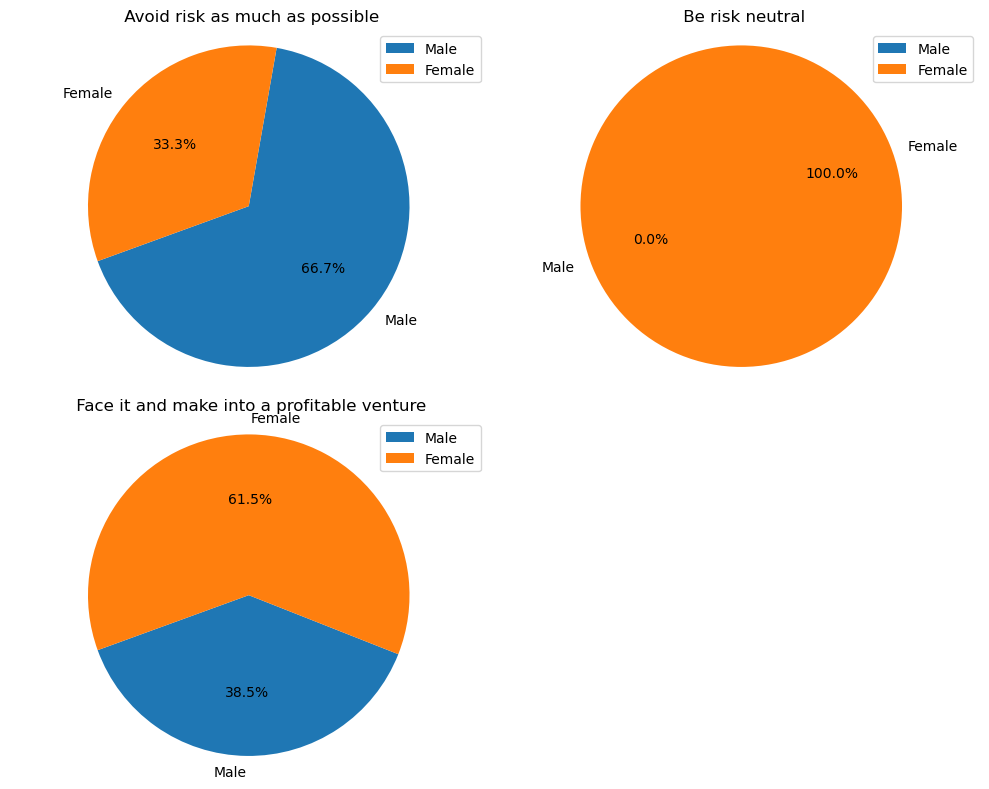

In [57]:
age_counts_by_gender = d.groupby(['How do you see yourself when encountered with risk?', 'Gender']).size().reset_index(name='Count')

# Create a dictionary to store the counts for each age
age_counts = {}
for age, gender, count in age_counts_by_gender.values:
    if age not in age_counts:
        age_counts[age] = {'Male': 0, 'Female': 0}
    age_counts[age][gender] = count

# Convert the dictionary to a DataFrame
age_counts_df = pd.DataFrame.from_dict(age_counts, orient='index')

# Calculate the number of rows and columns for the subplot grid
n_rows = 2
n_cols = (len(age_counts_df) + n_rows - 1) // n_rows

# Create subplots with equal aspect ratio
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10,8))
fig.subplots_adjust(hspace=0.4)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create a pie chart for each age
for i, (age, counts) in enumerate(age_counts_df.iterrows()):
    ax = axes[i]
    labels = counts.index
    sizes = counts.values
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=200)
    ax.set_title(f' {age}')
    ax.axis('equal')
    ax.legend(patches, labels, loc="upper right")

# Hide any unused subplots
for i in range(len(age_counts_df), n_rows * n_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


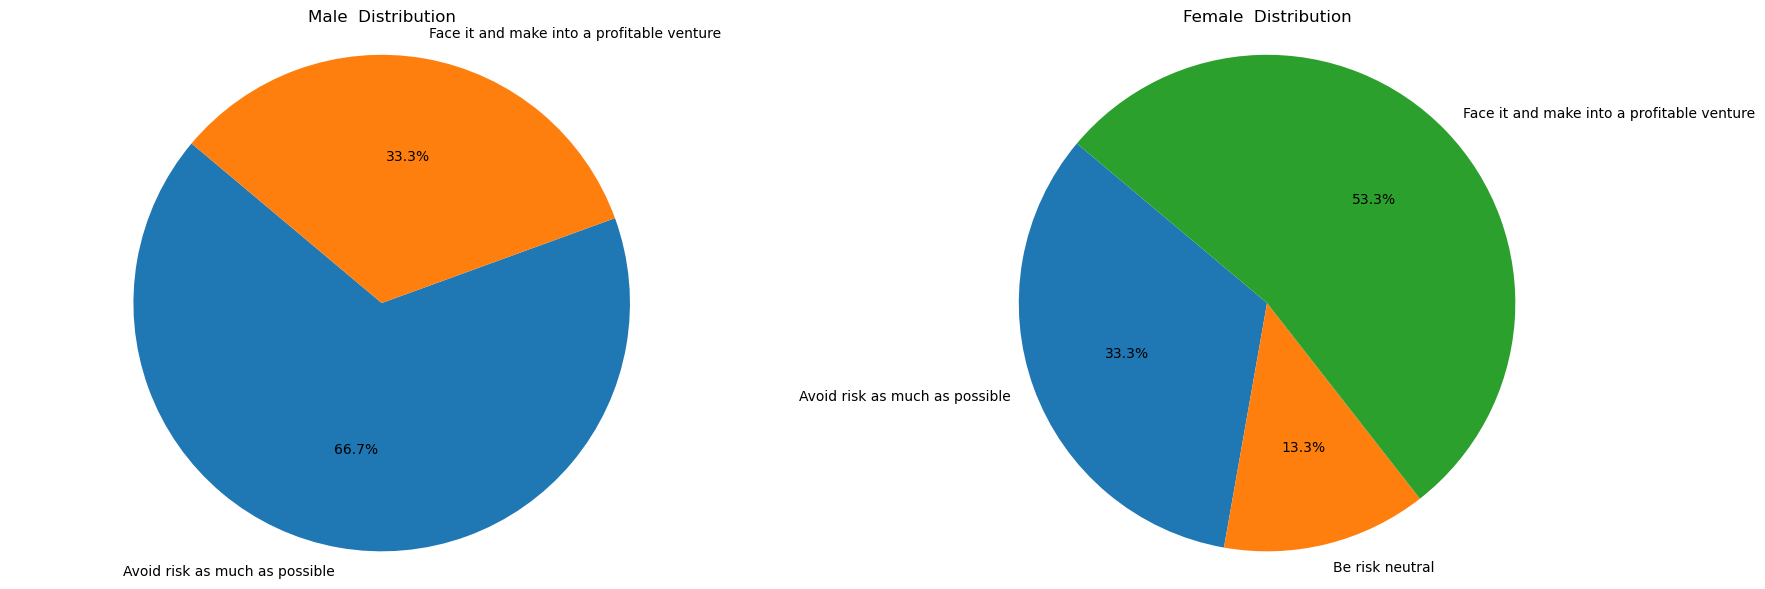

In [58]:
# Group the data by Gender and Age, then count the occurrences
age_counts_by_gender = d.groupby(['Gender', 'How do you see yourself when encountered with risk?']).size().reset_index(name='Count')

# Separate the data for each gender
male_age_counts = age_counts_by_gender[age_counts_by_gender['Gender'] == 'Male']
female_age_counts = age_counts_by_gender[age_counts_by_gender['Gender'] == 'Female']

# Create pie plots for each gender
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Male Age Distribution
axes[0].pie(male_age_counts['Count'], labels=male_age_counts['How do you see yourself when encountered with risk?'], autopct='%1.1f%%', startangle=140)
axes[0].set_title('Male  Distribution')
axes[0].axis('equal')

# Equal aspect ratio ensures that pie is drawn as a circle.

# Female Age Distribution
axes[1].pie(female_age_counts['Count'], labels=female_age_counts['How do you see yourself when encountered with risk?'], autopct='%1.1f%%', startangle=140)
axes[1].set_title('Female  Distribution')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

# What type of business do you prefer?

In [59]:
job_status_groups_by_gender = d.groupby([ "What type of business do you prefer?",'Gender']).size().reset_index(name='Count')
data=pd.DataFrame(job_status_groups_by_gender)
data

,What type of business do you prefer?,Gender,Count
0,Distribution agencies,Male,2
1,"Fashion, Beauty care or Style industry",Female,5
2,"Fashion, Beauty care or Style industry",Male,2
3,Hotel or Food industry,Female,2
4,Hotel or Food industry,Male,4
5,Manufacturing units,Male,1
6,Retail stores,Male,1
7,others,Female,8
8,others,Male,3


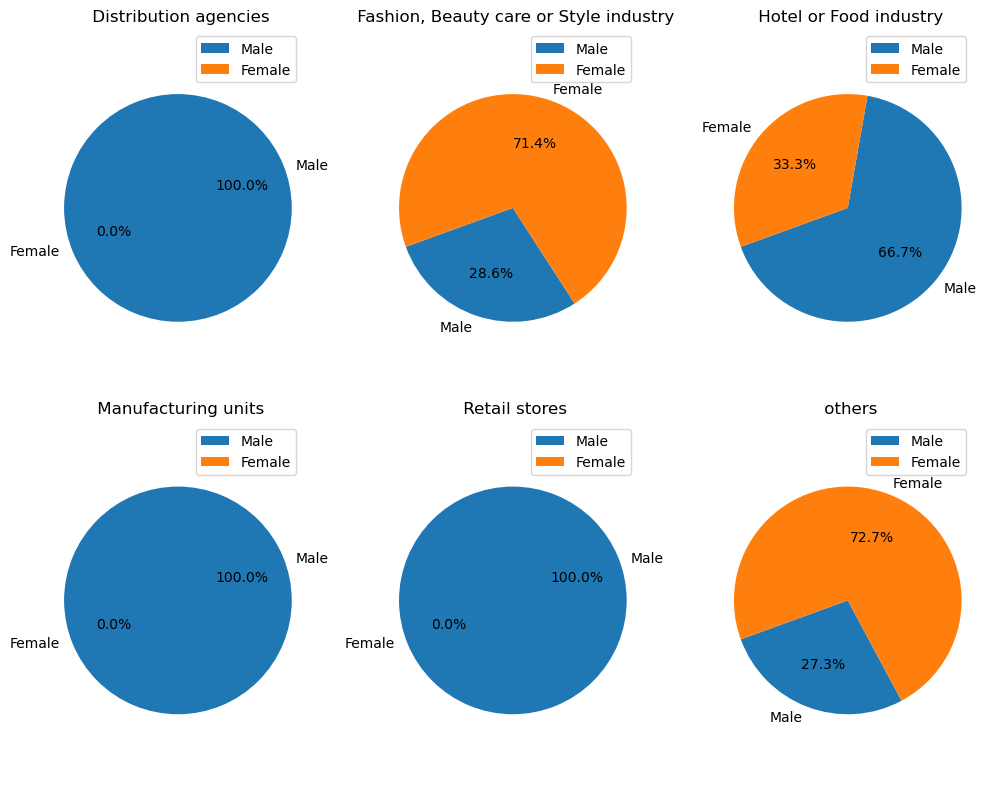

In [60]:
age_counts_by_gender = d.groupby(['What type of business do you prefer?', 'Gender']).size().reset_index(name='Count')

# Create a dictionary to store the counts for each age
age_counts = {}
for age, gender, count in age_counts_by_gender.values:
    if age not in age_counts:
        age_counts[age] = {'Male': 0, 'Female': 0}
    age_counts[age][gender] = count

# Convert the dictionary to a DataFrame
age_counts_df = pd.DataFrame.from_dict(age_counts, orient='index')

# Calculate the number of rows and columns for the subplot grid
n_rows = 2
n_cols = (len(age_counts_df) + n_rows - 1) // n_rows

# Create subplots with equal aspect ratio
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10,8))
fig.subplots_adjust(hspace=0.4)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create a pie chart for each age
for i, (age, counts) in enumerate(age_counts_df.iterrows()):
    ax = axes[i]
    labels = counts.index
    sizes = counts.values
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=200)
    ax.set_title(f' {age}')
    ax.axis('equal')
    ax.legend(patches, labels, loc="upper right")

# Hide any unused subplots
for i in range(len(age_counts_df), n_rows * n_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


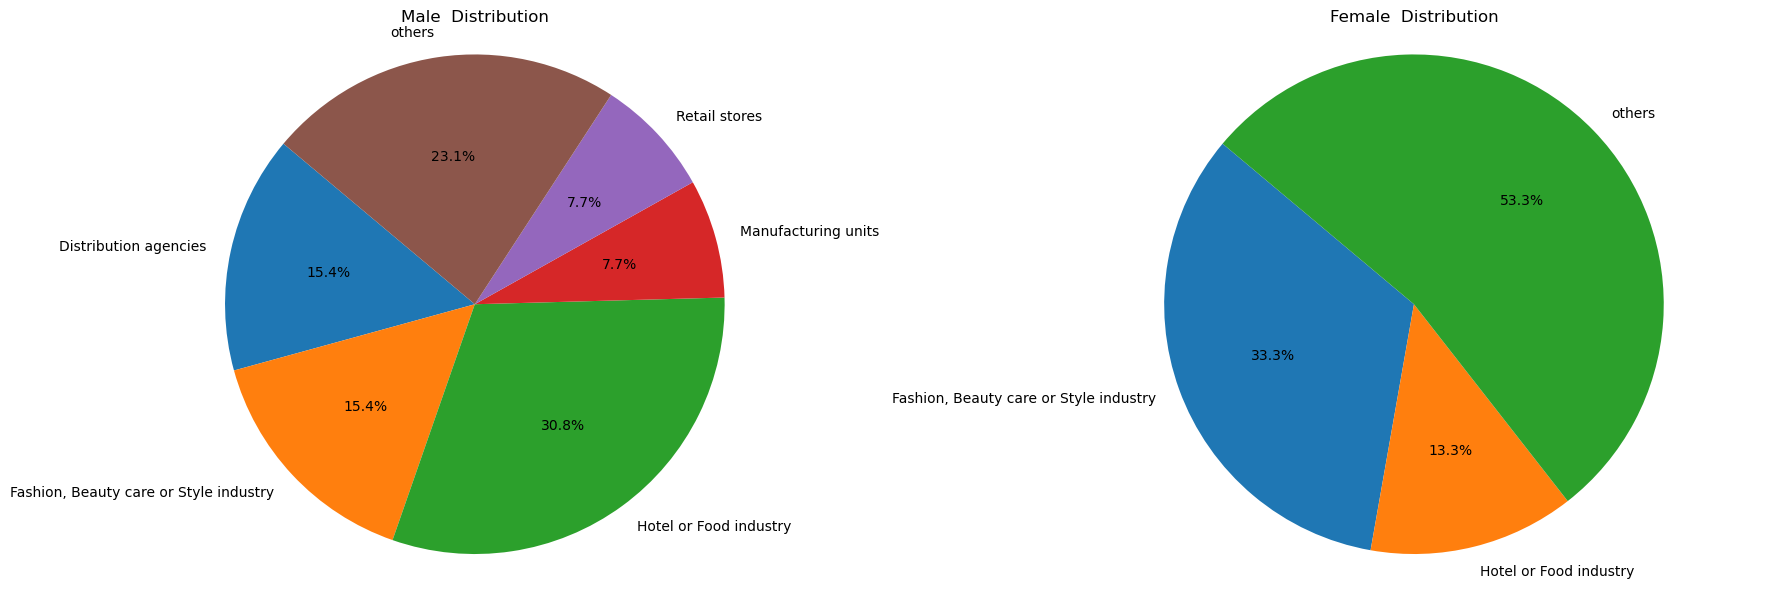

In [61]:
# Group the data by Gender and Age, then count the occurrences
age_counts_by_gender = d.groupby(['Gender', 'What type of business do you prefer?']).size().reset_index(name='Count')

# Separate the data for each gender
male_age_counts = age_counts_by_gender[age_counts_by_gender['Gender'] == 'Male']
female_age_counts = age_counts_by_gender[age_counts_by_gender['Gender'] == 'Female']

# Create pie plots for each gender
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Male Age Distribution
axes[0].pie(male_age_counts['Count'], labels=male_age_counts['What type of business do you prefer?'], autopct='%1.1f%%', startangle=140)
axes[0].set_title('Male  Distribution')
axes[0].axis('equal')

# Equal aspect ratio ensures that pie is drawn as a circle.

# Female Age Distribution
axes[1].pie(female_age_counts['Count'], labels=female_age_counts['What type of business do you prefer?'], autopct='%1.1f%%', startangle=140)
axes[1].set_title('Female  Distribution')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

# If given a choice, what kind of online businesses would you do?	

In [62]:
job_status_groups_by_gender = d.groupby([ "If given a choice, what kind of online businesses would you do?",'Gender']).size().reset_index(name='Count')
data=pd.DataFrame(job_status_groups_by_gender)
data

,"If given a choice, what kind of online businesses would you do?",Gender,Count
0,Digital Marketing,Female,4
1,Digital Marketing,Male,8
2,Distribution / Delivery of goods,Female,9
3,Distribution / Delivery of goods,Male,6
4,Stock marketing,Female,2
5,Stock marketing,Male,1


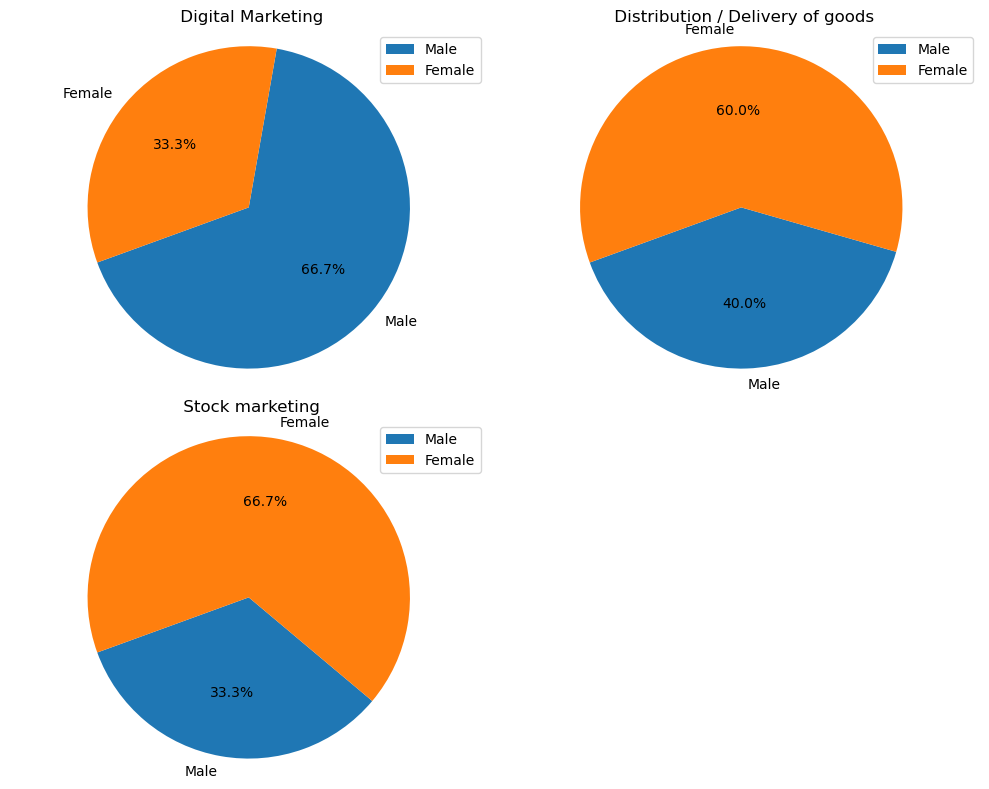

In [63]:
age_counts_by_gender = d.groupby(['If given a choice, what kind of online businesses would you do?', 'Gender']).size().reset_index(name='Count')

# Create a dictionary to store the counts for each age
age_counts = {}
for age, gender, count in age_counts_by_gender.values:
    if age not in age_counts:
        age_counts[age] = {'Male': 0, 'Female': 0}
    age_counts[age][gender] = count

# Convert the dictionary to a DataFrame
age_counts_df = pd.DataFrame.from_dict(age_counts, orient='index')

# Calculate the number of rows and columns for the subplot grid
n_rows = 2
n_cols = (len(age_counts_df) + n_rows - 1) // n_rows

# Create subplots with equal aspect ratio
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10,8))
fig.subplots_adjust(hspace=0.4)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create a pie chart for each age
for i, (age, counts) in enumerate(age_counts_df.iterrows()):
    ax = axes[i]
    labels = counts.index
    sizes = counts.values
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=200)
    ax.set_title(f' {age}')
    ax.axis('equal')
    ax.legend(patches, labels, loc="upper right")

# Hide any unused subplots
for i in range(len(age_counts_df), n_rows * n_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


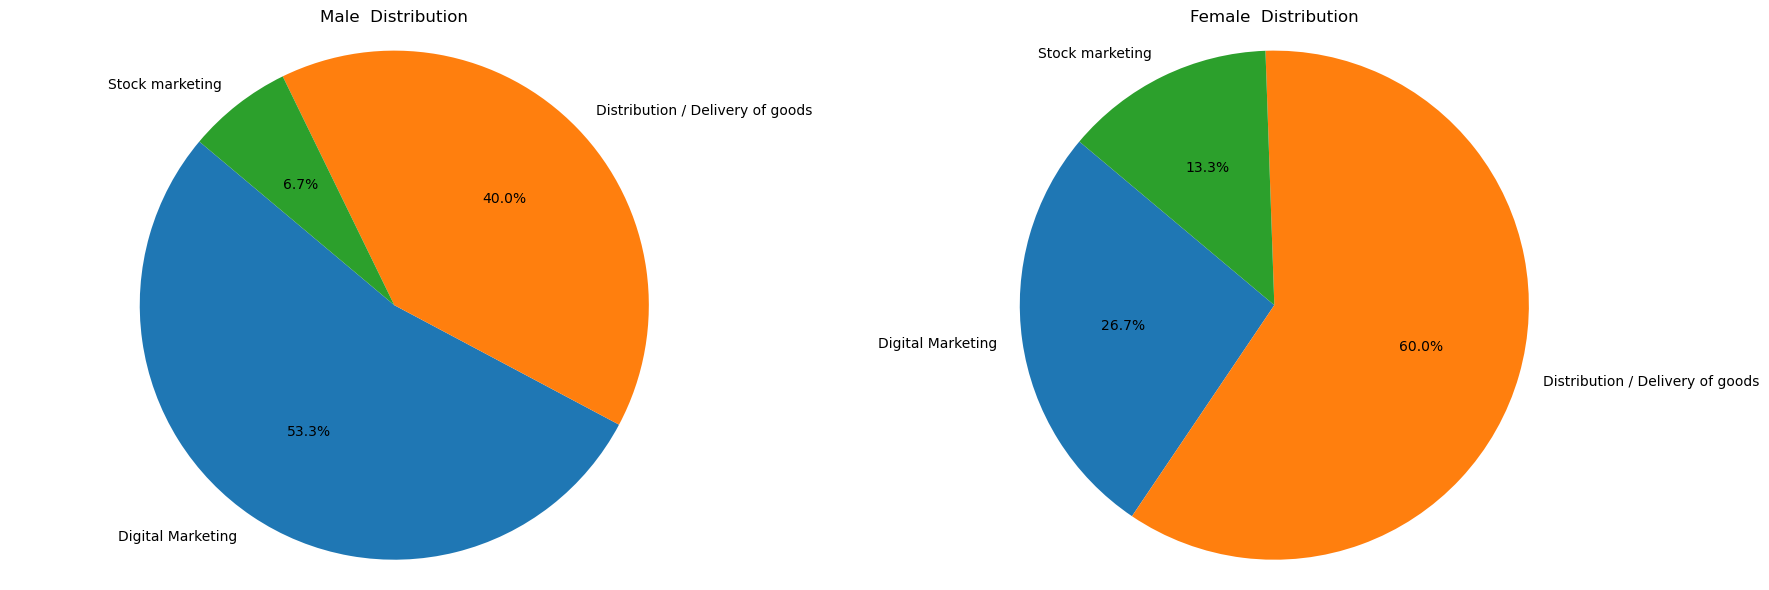

In [64]:
# Group the data by Gender and Age, then count the occurrences
age_counts_by_gender = d.groupby(['Gender', 'If given a choice, what kind of online businesses would you do?']).size().reset_index(name='Count')

# Separate the data for each gender
male_age_counts = age_counts_by_gender[age_counts_by_gender['Gender'] == 'Male']
female_age_counts = age_counts_by_gender[age_counts_by_gender['Gender'] == 'Female']

# Create pie plots for each gender
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Male Age Distribution
axes[0].pie(male_age_counts['Count'], labels=male_age_counts['If given a choice, what kind of online businesses would you do?'], autopct='%1.1f%%', startangle=140)
axes[0].set_title('Male  Distribution')
axes[0].axis('equal')

# Equal aspect ratio ensures that pie is drawn as a circle.

# Female Age Distribution
axes[1].pie(female_age_counts['Count'], labels=female_age_counts['If given a choice, what kind of online businesses would you do?'], autopct='%1.1f%%', startangle=140)
axes[1].set_title('Female  Distribution')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

In [65]:
d.columns

Index(['Gender', 'Age', 'Annual Income', 'Religion', 'Social group\n',
       'Economic group', 'Educational Qualification', 'Geographical Area',
       'Job Status', 'Are you aware of the micro credit schemes of the govt?',
       'If given an opportunity , I will definitely start up a new business. How well do you agree with this statement?',
       'Financial Assets you own', 'Do you own a business?',
       'Does any one of your family members own any business ?',
       'Are you interested in taking up business as a full time income generation tool?',
       'Do you prefer to take up business as a secondary activity?',
       'What kind of business ownership do you prefer?',
       'How do you see yourself when encountered with risk?',
       'What type of business do you prefer?',
       'If given a choice, what kind of online businesses would you do?',
       'What do you think are the reasons why people are not starting new businesses? (multiple options possible)',
       ' Pre

# Multiple Answers

# Preferred source of capital for starting a new business

In [66]:
import pandas as pd

import pandas as pd

# Sample DataFrame with a column containing multiple values in each cell


# Initialize a dictionary to store value counts
value_counts = {}

# Loop through each cell and split the values if there are up to 4 values
for cell_values in d[" Preferred source of capital for starting a new business "]:
    values_list = cell_values.split(';')
    values_to_count = values_list[:4]  # Keep at most 4 values
    for value in values_to_count:
        if value not in value_counts:
            value_counts[value] = 1
        else:
            value_counts[value] += 1

# Convert the value counts dictionary to a DataFrame
counts_df = pd.DataFrame.from_dict(value_counts, orient='index', columns=['count'])

print(counts_df)


                                      count
Loans and other institutional credit     25
Borrowing from friends or family          3
Past savings                              7
Other                                     2


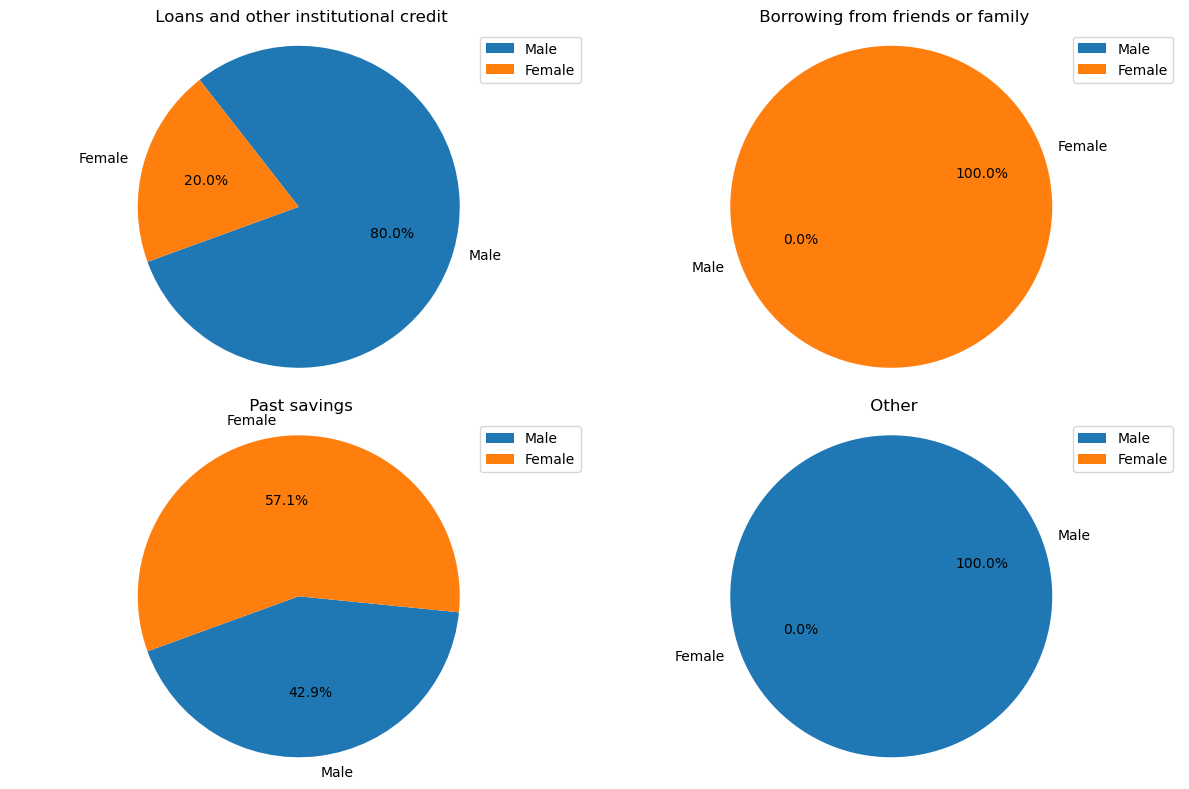

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame 'd'

value_counts = {}

# Loop through each cell and split the values if there are up to 4 values
for cell_values in d[" Preferred source of capital for starting a new business "]:
    values_list = cell_values.split(';')
    values_to_count = values_list[:4]  # Keep at most 4 values
    for value in values_to_count:
        if value not in value_counts:
            value_counts[value] = {'Male': 0, 'Female': 0}
        value_counts[value][d.loc[d[" Preferred source of capital for starting a new business "] == cell_values, 'Gender'].values[0]] += 1

# Convert the value counts dictionary to a DataFrame
counts_df = pd.DataFrame.from_dict(value_counts, orient='index')

# Create subplots with equal aspect ratio
n_rows = (len(counts_df) + 1) // 2
n_cols = 2
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 8))
fig.subplots_adjust(hspace=0.4)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create a pie chart for each source of capital
for i, (source, counts) in enumerate(counts_df.iterrows()):
    ax = axes[i]
    labels = counts.index
    sizes = counts.values
    patches, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=200)
    ax.set_title(f' {source}')
    ax.axis('equal')
    ax.legend(patches, labels, loc='upper right')

# Hide any unused subplots
for i in range(len(counts_df), n_rows * n_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


# What do you think are the reasons why people are not starting new businesses? (multiple options possible)

In [68]:

# Initialize a dictionary to store value counts
value_counts = {}

# Loop through each cell and split the values if there are up to 4 values
for cell_values in d["What do you think are the reasons why people are not starting new businesses? (multiple options possible)"]:
    values_list = cell_values.split(';')
    values_to_count = values_list[:4]  # Keep at most 4 values
    for value in values_to_count:
        if value not in value_counts:
            value_counts[value] = 1
        else:
            value_counts[value] += 1

# Convert the value counts dictionary to a DataFrame
counts_df = pd.DataFrame.from_dict(value_counts, orient='index', columns=['count'])
counts_df

,count
Lack of funds,22
Govt policies,7
Lack of support from friends and family,13
Lack of business opportunities,8
Do not want to take risk,1
Presence of favoratism and corruption,1


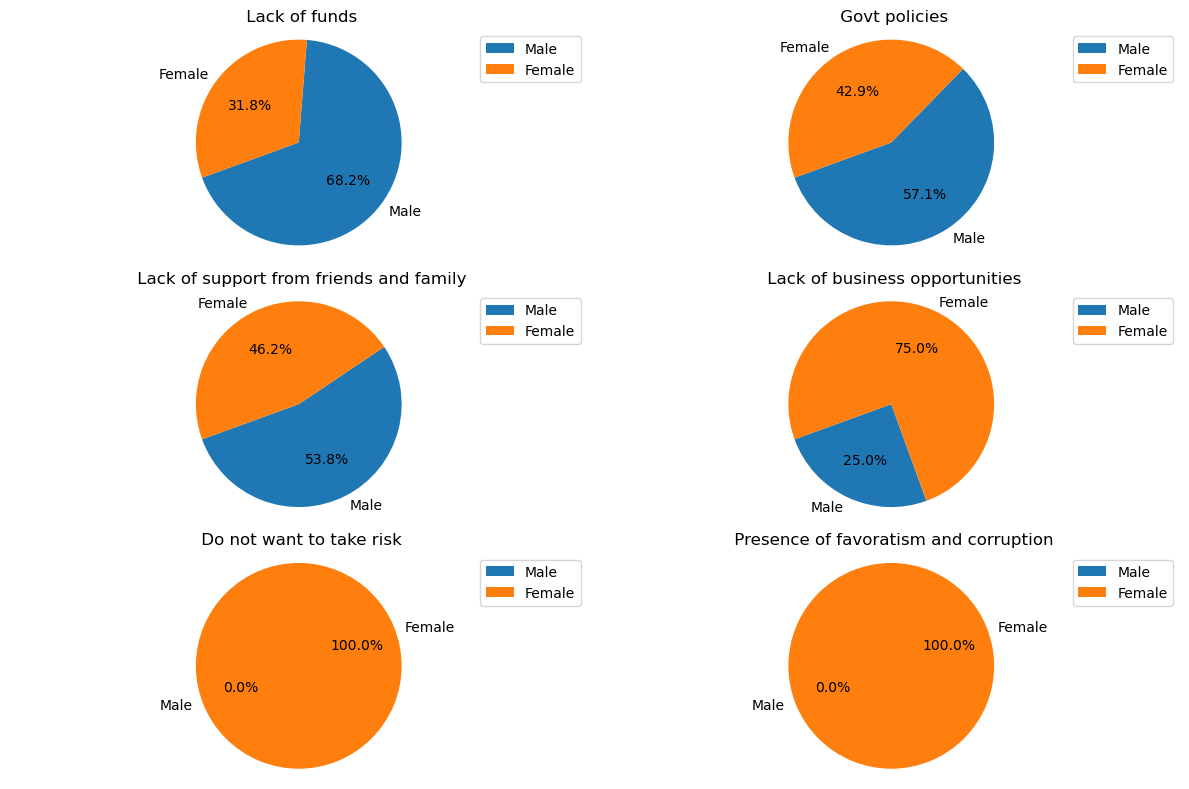

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame 'd'

value_counts = {}

# Loop through each cell and split the values if there are up to 4 values
for cell_values in d["What do you think are the reasons why people are not starting new businesses? (multiple options possible)"]:
    values_list = cell_values.split(';')
    values_to_count = values_list[:4]  # Keep at most 4 values
    for value in values_to_count:
        if value not in value_counts:
            value_counts[value] = {'Male': 0, 'Female': 0}
        value_counts[value][d.loc[d["What do you think are the reasons why people are not starting new businesses? (multiple options possible)"] == cell_values, 'Gender'].values[0]] += 1

# Convert the value counts dictionary to a DataFrame
counts_df = pd.DataFrame.from_dict(value_counts, orient='index')

# Create subplots with equal aspect ratio
n_rows = (len(counts_df) + 1) // 2
n_cols = 2
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 8))
fig.subplots_adjust(hspace=0.4)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create a pie chart for each source of capital
for i, (source, counts) in enumerate(counts_df.iterrows()):
    ax = axes[i]
    labels = counts.index
    sizes = counts.values
    patches, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=200)
    ax.set_title(f' {source}')
    ax.axis('equal')
    ax.legend(patches, labels, loc='upper right')

# Hide any unused subplots
for i in range(len(counts_df), n_rows * n_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


# Financial Assets you own

In [70]:
import pandas as pd

import pandas as pd

# Sample DataFrame with a column containing multiple values in each cell


# Initialize a dictionary to store value counts
value_counts = {}

# Loop through each cell and split the values if there are up to 4 values
for cell_values in d["Financial Assets you own"]:
    values_list = cell_values.split(';')
    values_to_count = values_list[:4]  # Keep at most 4 values
    for value in values_to_count:
        if value not in value_counts:
            value_counts[value] = 1
        else:
            value_counts[value] += 1

# Convert the value counts dictionary to a DataFrame
counts_df = pd.DataFrame.from_dict(value_counts, orient='index', columns=['count'])

print(counts_df)


                     count
Savings in Bank         21
Gold                    15
Land                    13
Shares/Debentures        3
Other securities         4
Govt Treasury bills      1


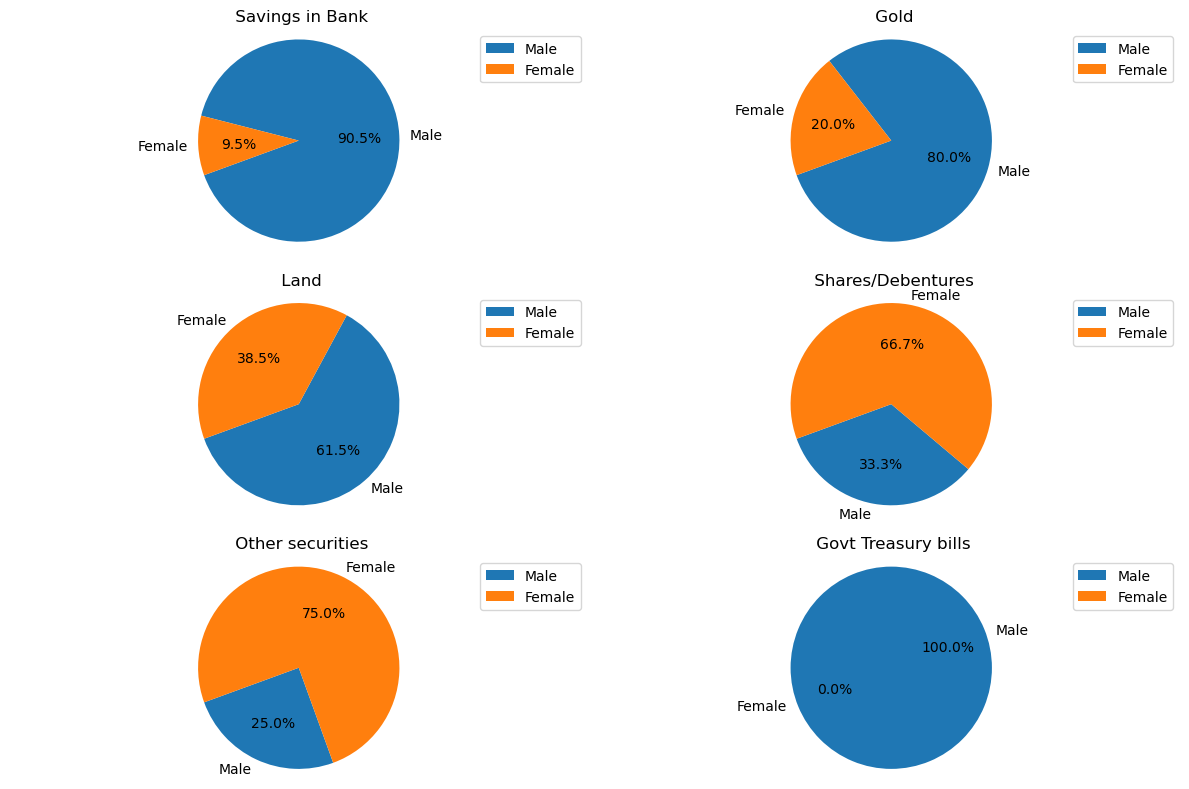

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame 'd'

value_counts = {}

# Loop through each cell and split the values if there are up to 4 values
for cell_values in d["Financial Assets you own"]:
    values_list = cell_values.split(';')
    values_to_count = values_list[:4]  # Keep at most 4 values
    for value in values_to_count:
        if value not in value_counts:
            value_counts[value] = {'Male': 0, 'Female': 0}
        value_counts[value][d.loc[d["Financial Assets you own"] == cell_values, 'Gender'].values[0]] += 1

# Convert the value counts dictionary to a DataFrame
counts_df = pd.DataFrame.from_dict(value_counts, orient='index')

# Create subplots with equal aspect ratio
n_rows = (len(counts_df) + 1) // 2
n_cols = 2
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 8))
fig.subplots_adjust(hspace=0.4)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create a pie chart for each source of capital
for i, (source, counts) in enumerate(counts_df.iterrows()):
    ax = axes[i]
    labels = counts.index
    sizes = counts.values
    patches, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=200)
    ax.set_title(f' {source}')
    ax.axis('equal')
    ax.legend(patches, labels, loc='upper right')

# Hide any unused subplots
for i in range(len(counts_df), n_rows * n_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [88]:
!pip install pandoc

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for plumbum from https://files.pythonhosted.org/packages/6f/e8/a9a580d1d67825d8bdc16f3993ea58c4066769d5f8ba34caaa69a5344b39/plumbum-1.8.2-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/49.6 kB ? eta -:--:--
     -------- ------------------------------- 10.2/49.6 kB ? eta -:--:--
     -------------------------------------- 49.6/49.6 kB 624.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/127.0 kB ? eta -:--:--
   ------------ --------------------------- 41.0/127.0 kB ? eta -:--:--
   ------------ --------------------------- 41.0/127.0 kB ? eta -:--:--
   ------------ --------------------------- 41.0/127.0 kB ? eta -:--:--
   ------------ --------------------------- 41.0/127.0 kB ? eta -:--:--
   -------------------------------------- 127.0/127.0 kB 535.8 kB/s eta 0:00:00
  Created wheel for pandoc: filenam

DEPRECATION: colab 1.13.5 has a non-standard dependency specifier pytz>=2011n. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of colab or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [89]:
import subprocess


# Input and output filenames
input_file = r"C:\Users\Arishma\Gender.ipynb"
output_file = "output_document.docx"

# Convert using Pandoc
subprocess.run(["pandoc", input_file, "-o", output_file])


FileNotFoundError: [WinError 2] The system cannot find the file specified